In [4]:
import numpy as np
import scipy as sc
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import minimize

In [5]:
insample_num = 2264

df_daily = pd.read_excel('D:\QRM_Program\Thesis\data_daily_AABACATGEKO_2001_2012.xlsx') 
df_daily['date'] = pd.to_datetime(df_daily['date'], format='%Y%m%d')
vData = df_daily.iloc[:insample_num,[1,2,3,4,5]].T
Array_vData = np.array(vData)

df_RM = pd.read_excel('D:\QRM_Program\Thesis\data_daily_AABACATGEKO_2001_2012.xlsx', sheet_name = "vec_realized_kernel") 
df_RM['date'] = pd.to_datetime(df_RM['date'], format='%Y%m%d')
df_RM = df_RM.set_index('date')

v_RM = np.array(df_RM.iloc[:insample_num,:,])
v_RM_bar = []
for j in df_RM.columns:
    v_RM_mean = df_RM[j][:insample_num].mean()
    v_RM_bar.append(v_RM_mean)
v_RM_bar = np.array(v_RM_bar)

v_RM_Outofsample = np.array(df_RM.iloc[insample_num:,:,])
VRM5by5 = []
for i in range(753):
    v_RM_5by5 = v_RM_Outofsample[i].reshape(-5,5)
    VRM5by5.append(v_RM_5by5)
V_RM5by5 = np.array(VRM5by5)

In [6]:
Full_RM = np.array(df_RM)

In [ ]:
Fullsample_v_RM5by5 = []
for i in range(len(v_RM)):
    Fullsamplev_RM_5by5 = v_RM[i].reshape(-5,5)
    Insample_v_RM5by5.append(Insamplev_RM_5by5 )
Insample_v_RM5by5 = np.array(Insample_v_RM5by5)

In [185]:
df_RM

,11,12,13,14,15,21,22,23,24,25,...,41,42,43,44,45,51,52,53,54,55
date,,,,,,,,,,,,,,,,,,,,,
2001-01-02,9.867442,1.223799,0.488818,0.914870,2.312710,1.223799,8.692514,0.606278,3.477878,0.252007,...,0.914870,3.477878,0.373367,13.029019,1.071458,2.312710,0.252007,1.735490,1.071458,3.259858
2001-01-03,31.211301,16.706596,16.249067,19.201622,3.977724,16.706596,24.326158,11.506265,14.736116,3.008786,...,19.201622,14.736116,15.579186,26.851744,3.709961,3.977724,3.008786,2.640566,3.709961,9.598802
2001-01-04,7.684383,-0.296060,2.443277,2.567688,-0.360670,-0.296060,9.466141,-2.408832,0.424026,1.454341,...,2.567688,0.424026,2.227753,6.530793,-0.931920,-0.360670,1.454341,-0.426696,-0.931920,3.984733
2001-01-05,17.716272,1.495283,0.179372,4.849778,1.386822,1.495283,7.977884,1.509359,1.626869,0.195203,...,4.849778,1.626869,5.376504,13.900798,1.216797,1.386822,0.195203,0.853936,1.216797,3.591686
2001-01-08,20.375705,3.585444,2.133801,3.477011,0.700547,3.585444,6.280342,0.555005,1.925878,1.354074,...,3.477011,1.925878,0.517958,6.569205,1.678810,0.700547,1.354074,1.160962,1.678810,4.311569
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-12-24,1.217703,0.035058,0.108654,0.130581,0.049046,0.035058,0.570747,0.040809,0.163763,0.047049,...,0.130581,0.163763,0.077454,0.500233,0.077396,0.049046,0.047049,0.024828,0.077396,0.266905
2012-12-26,1.248541,0.165443,0.340756,0.293992,0.159899,0.165443,0.348743,0.158755,0.154766,0.113720,...,0.293992,0.154766,0.398918,0.811278,0.276866,0.159899,0.113720,0.190212,0.276866,0.564713
2012-12-27,2.359671,1.035157,1.051381,1.026378,0.656041,1.035157,1.465350,0.895694,0.861278,0.578659,...,1.026378,0.861278,0.993366,1.564685,0.666055,0.656041,0.578659,0.664253,0.666055,0.759170


In [213]:
df_RM_Summary = df_RM.describe()

In [214]:
df_RM_Summary

,11,12,13,14,15,21,22,23,24,25,...,41,42,43,44,45,51,52,53,54,55
count,3017.000000,3017.000000,3017.000000,3017.000000,3017.000000,3017.000000,3017.000000,3017.000000,3017.000000,3017.000000,...,3017.000000,3017.000000,3017.000000,3017.000000,3017.000000,3017.000000,3017.000000,3017.000000,3017.000000,3017.000000
mean,5.359284,1.457772,1.973832,1.768958,0.849699,1.457772,2.871982,1.335272,1.310359,0.694761,...,1.768958,1.310359,1.603083,3.380572,0.834878,0.849699,0.694761,0.757865,0.834878,1.441131
std,9.983154,3.472618,4.459011,4.406187,2.420819,3.472618,4.015741,2.864057,2.841840,1.685988,...,4.406187,2.841840,3.536267,7.834029,2.113573,2.420819,1.685988,2.011555,2.113573,2.645091
min,0.244854,-1.343208,-1.140024,-1.336398,-2.308382,-1.343208,0.190395,-2.408832,-2.896681,-2.243376,...,-1.336398,-2.896681,-2.508667,0.081433,-2.029699,-2.308382,-2.243376,-1.480036,-2.029699,0.053741
25%,1.843236,0.282935,0.424799,0.293332,0.144472,0.282935,1.003631,0.302896,0.246517,0.137088,...,0.293332,0.246517,0.308007,0.727527,0.152037,0.144472,0.137088,0.151735,0.152037,0.489765
50%,2.928285,0.614048,0.877439,0.668185,0.348129,0.614048,1.719160,0.637193,0.543116,0.298188,...,0.668185,0.543116,0.665823,1.446810,0.334206,0.348129,0.298188,0.337638,0.334206,0.818728
75%,4.924699,1.374798,1.788996,1.575176,0.751209,1.374798,3.135040,1.331353,1.227532,0.636213,...,1.575176,1.227532,1.478912,3.064759,0.771094,0.751209,0.636213,0.707652,0.771094,1.479106
max,245.304599,76.208947,104.044685,116.041043,80.196412,76.208947,75.215213,58.692155,48.624508,41.908145,...,116.041043,48.624508,74.534271,157.597939,59.940512,80.196412,41.908145,64.889358,59.940512,88.248683


In [212]:
df_RM_Summary_Dia

,11,22,33,44,55
count,3017.000000,3017.000000,3017.000000,3017.000000,3017.000000
mean,5.359284,2.871982,3.432566,3.380572,1.441131
std,9.983154,4.015741,5.425976,7.834029,2.645091
min,0.244854,0.190395,0.206981,0.081433,0.053741
25%,1.843236,1.003631,1.277890,0.727527,0.489765
50%,2.928285,1.719160,1.990742,1.446810,0.818728
75%,4.924699,3.135040,3.449642,3.064759,1.479106
max,245.304599,75.215213,127.251375,157.597939,88.248683


In [216]:
from scipy.stats import kurtosis
from scipy.stats import skew
from pandas import Series, DataFrame

In [217]:
df_de = df_RM.describe()
ku=pd.DataFrame(df_RM.kurtosis(axis=0)).T
ku.index = Series(['Kurtosis'])
skew=pd.DataFrame(df_RM.skew(axis=0)).T
skew.index=Series(['Skewness'])
frames =[df_de,ku,skew]

In [220]:
df_description = pd.concat(frames)

,11,12,13,14,15,21,22,23,24,25,...,41,42,43,44,45,51,52,53,54,55
count,3017.000000,3017.000000,3017.000000,3017.000000,3017.000000,3017.000000,3017.000000,3017.000000,3017.000000,3017.000000,...,3017.000000,3017.000000,3017.000000,3017.000000,3017.000000,3017.000000,3017.000000,3017.000000,3017.000000,3017.000000
mean,5.359284,1.457772,1.973832,1.768958,0.849699,1.457772,2.871982,1.335272,1.310359,0.694761,...,1.768958,1.310359,1.603083,3.380572,0.834878,0.849699,0.694761,0.757865,0.834878,1.441131
std,9.983154,3.472618,4.459011,4.406187,2.420819,3.472618,4.015741,2.864057,2.841840,1.685988,...,4.406187,2.841840,3.536267,7.834029,2.113573,2.420819,1.685988,2.011555,2.113573,2.645091
min,0.244854,-1.343208,-1.140024,-1.336398,-2.308382,-1.343208,0.190395,-2.408832,-2.896681,-2.243376,...,-1.336398,-2.896681,-2.508667,0.081433,-2.029699,-2.308382,-2.243376,-1.480036,-2.029699,0.053741
25%,1.843236,0.282935,0.424799,0.293332,0.144472,0.282935,1.003631,0.302896,0.246517,0.137088,...,0.293332,0.246517,0.308007,0.727527,0.152037,0.144472,0.137088,0.151735,0.152037,0.489765
50%,2.928285,0.614048,0.877439,0.668185,0.348129,0.614048,1.719160,0.637193,0.543116,0.298188,...,0.668185,0.543116,0.665823,1.446810,0.334206,0.348129,0.298188,0.337638,0.334206,0.818728
75%,4.924699,1.374798,1.788996,1.575176,0.751209,1.374798,3.135040,1.331353,1.227532,0.636213,...,1.575176,1.227532,1.478912,3.064759,0.771094,0.751209,0.636213,0.707652,0.771094,1.479106
max,245.304599,76.208947,104.044685,116.041043,80.196412,76.208947,75.215213,58.692155,48.624508,41.908145,...,116.041043,48.624508,74.534271,157.597939,59.940512,80.196412,41.908145,64.889358,59.940512,88.248683
Kurtosis,165.450507,122.747242,141.445407,206.073110,411.087690,122.747242,59.465727,101.357565,72.261142,159.773419,...,206.073110,72.261142,104.578563,110.627814,242.083493,411.087690,159.773419,372.355207,242.083493,404.773031
Skewness,10.000246,8.966272,9.445560,11.002916,15.409635,8.966272,5.957091,8.253248,7.089271,9.834611,...,11.002916,7.089271,8.084014,8.688574,11.877946,15.409635,9.834611,14.640290,11.877946,14.811170


In [222]:
df_RM_Summary_Dia =df_description.loc[:, [11, 22, 33, 44, 55]]

In [223]:
df_RM_Summary_Dia

,11,22,33,44,55
count,3017.000000,3017.000000,3017.000000,3017.000000,3017.000000
mean,5.359284,2.871982,3.432566,3.380572,1.441131
std,9.983154,4.015741,5.425976,7.834029,2.645091
min,0.244854,0.190395,0.206981,0.081433,0.053741
25%,1.843236,1.003631,1.277890,0.727527,0.489765
50%,2.928285,1.719160,1.990742,1.446810,0.818728
75%,4.924699,3.135040,3.449642,3.064759,1.479106
max,245.304599,75.215213,127.251375,157.597939,88.248683
Kurtosis,165.450507,59.465727,118.557299,110.627814,404.773031
Skewness,10.000246,5.957091,8.144687,8.688574,14.811170


In [224]:
print(df_RM_Summary_Dia.to_latex(float_format="%.3f",index=True))  

\begin{tabular}{lrrrrr}
\toprule
{} &       11 &       22 &       33 &       44 &       55 \\
\midrule
count    & 3017.000 & 3017.000 & 3017.000 & 3017.000 & 3017.000 \\
mean     &    5.359 &    2.872 &    3.433 &    3.381 &    1.441 \\
std      &    9.983 &    4.016 &    5.426 &    7.834 &    2.645 \\
min      &    0.245 &    0.190 &    0.207 &    0.081 &    0.054 \\
25\%      &    1.843 &    1.004 &    1.278 &    0.728 &    0.490 \\
50\%      &    2.928 &    1.719 &    1.991 &    1.447 &    0.819 \\
75\%      &    4.925 &    3.135 &    3.450 &    3.065 &    1.479 \\
max      &  245.305 &   75.215 &  127.251 &  157.598 &   88.249 \\
Kurtosis &  165.451 &   59.466 &  118.557 &  110.628 &  404.773 \\
Skewness &   10.000 &    5.957 &    8.145 &    8.689 &   14.811 \\
\bottomrule
\end{tabular}



In [8]:
class cMaximizeLikelihood:
    def __init__(self):
        self.x0 = []
        self.x = []
        self.tx0 = []
        self.tx = []
        self.likelihoodvalue = []
        self.tcovariancematrix = []
        self.covariancematrix = []
        self.filter = []
        self.success = False


# In[5]:

###########################################################
### vh= _gh_stepsize(vP)
def _gh_stepsize(vP):
    """
    Purpose:
        Calculate stepsize close (but not too close) to machine precision
        
    Inputs:
        vP      1D array of parameters
        
    Return value:
        vh      1D array of step sizes
    """
    
    vh = 1e-8*(np.fabs(vP)+1e-8)   # Find stepsize
    vh = np.maximum(vh, 5e-6)      # Don't go too small
    
    return vh


# In[6]:

###########################################################
### vG= gradient_2sided(fun, vP, *args)
def gradient_2sided(fun, vP, *args):
    """
    Purpose:
        Compute numerical gradient, using a 2-sided numerical difference
        Author:Charles Bos, following Kevin Sheppard's hessian_2sided, with
        ideas/constants from Jurgen Doornik's Num1Derivative
        
    Inputs:
        fun     function, as used for minimize()
        vP      1D array of size iP of optimal parameters
        args    (optional) extra arguments
    
    Return value:
        vG      iP vector with gradient
        
    See also:
        scipy.optimize.approx_fprime, for forward difference
    """
    
    iP   =  np.size(vP)
    vP   =  vP.reshape(iP)      # Ensure vP is 1D-array
    
    #  f  = fun(vP, *args)      # central function value is not needed
    vh= _gh_stepsize(vP)
    mh   =  np.diag(vh)         # Build a  diagonal matrix out of h
    
    fp = np.zeros(iP)
    fm = np.zeros(iP)
    for i in range(iP):         # Find f(x+h), f(x-h)
        fp[i] =  fun(vP+mh[i], *args)
        fm[i] =  fun(vP-mh[i], *args)
        
    vhr = (vP +  vh) - vP       # Check for effective stepsize right
    vhl = vP - (vP - vh)        # Check for effective stepsize left
    vG= (fp -  fm) /  (vhr +  vhl)  # Get central gradient
    
    return vG


# In[7]:

###########################################################
### mG= jacobian_2sided(fun, vP, *args)
def jacobian_2sided(fun, vP, *args):
    """
    Purpose:
        Compute numerical jacobian, using a 2-sided numerical difference
        
    Author:
        Charles Bos, following Kevin Sheppard's hessian_2sided, with
        ideas/constants from Jurgen Doornik's Num1Derivative
        
    Inputs:
        fun     function, return 1D array of size iN
        vP      1D array of size iP of optimal parameters
        args    (optional) extra arguments
        
    Return value:
        mG      iN x  iP   matrix with jacobian
        
    See also:numdifftools.Jacobian(), for similar output
    """
    iP = np.size(vP)
    vP = vP.reshape(iP)        # Ensure vP is 1D-array
    vF = fun(vP, *args)        # evaluate function, only to get size
    iN = vF.size
    vh= _gh_stepsize(vP)
    mh   =  np.diag(vh)        # Build a  diagonal matrix out of h
    mGp = np.zeros((iN, iP))
    mGm = np.zeros((iN, iP))
    for i in   range(iP):     # Find f(x+h), f(x-h)
        mGp[:,i] =  fun(vP+mh[i], *args)
        mGm[:,i] =  fun(vP-mh[i], *args)
    vhr = (vP +  vh) - vP    # Check for effective stepsize right
    vhl = vP   -  (vP -  vh)    # Check for effective stepsize left
    mG= (mGp -  mGm) / (vhr +  vhl)  # Get central jacobian
    return mG


# In[8]:

###########################################################
### mH= hessian_2sided(fun, vP, *args)
def hessian_2sided(fun, vP, *args):
    """
    Purpose:
        Compute numerical hessian, using a  2-sided numerical difference
        
    Author:Kevin Sheppard, adapted by Charles Bos
    
    Source:https://www.kevinsheppard.com/Python_for_Econometrics
    
    Inputs:
        fun     function, as used for minimize()
        vP      1D array of size iP of optimal parameters
        args    (optional) extra arguments
        
    Return value:
        mH      iP x  iP matrix with symmetric hessian
    """
    iP = np.size(vP,0)
    vP= vP.reshape(iP)    # Ensure vP is 1D-array
    f = fun(vP, *args)
    vh= _gh_stepsize(vP)
    vPh = vP + vh
    vh = vPh - vP
    
    mh = np.diag(vh)      # Build a  diagonal matrix out of vh
    
    fp   =  np.zeros(iP)
    fm   =  np.zeros(iP)
    for i in range(iP):
        fp[i] =  fun(vP+mh[i], *args)
        fm[i] =  fun(vP-mh[i], *args)
    
    fpp = np.zeros((iP,iP))
    fmm = np.zeros((iP,iP))
    for i in   range(iP):
        for j in   range(i,iP):
            fpp[i,j] =  fun(vP +  mh[i] +  mh[j], *args)
            fpp[j,i] =  fpp[i,j]
            fmm[i,j] =  fun(vP -  mh[i] -  mh[j], *args)
            fmm[j,i] =  fmm[i,j]
            
    vh   =  vh.reshape((iP,1))
    mhh = vh   @  vh.T             # mhh= h  h', outer product of h-vector
    
    mH   =  np.zeros((iP,iP))
    for i in range(iP):
        for j in range(i,iP):
            mH[i,j] =  (fpp[i,j] -  fp[i] - fp[j] +  f  +  f  - fm[i] -  fm[j] + fmm[i,j])/mhh[i,j]/2
            mH[j,i] =  mH[i,j]
            
    return mH


# In[9]:

###########################################################
### mS2= GetCovML(fnNAvgLnL, vP, iN, *args)
def GetCovML(fnNAvgLnL, vP, iN, *args):
    """
    Purpose:
        Get the covariance matrix of the ML estimation
        
    Inputs:
        fnNAvgLnL   function, negative average loglikelihood
        vP          iP array of parameters
        iN          integer, number of observations
        *args       (optional) additional arguments to function
    
    Return value:
        mS2         iP x  iP covariance matrix
    """
    
    mH= hessian_2sided(fnNAvgLnL, vP, *args)
    mS2= np.linalg.inv(mH)
    mS2= (mS2 +  mS2.T)/2       #  Force mS2 to be symmetric
    
    return mS2

#### Scalar BEKK Model

In [9]:
def fGarchFilter(vData, dAlpha, dBeta, dSigma2):
    dMu = np.array([np.mean(df_daily['AA'][0:insample_num]), 
                np.mean(df_daily['BA'][0:insample_num]), 
                np.mean(df_daily['CAT'][0:insample_num]), 
                np.mean(df_daily['GE'][0:insample_num]), 
                np.mean(df_daily['KO'][0:insample_num])])
    dMu = dMu.reshape(-1,1)
    Array_vData = np.array(vData)
    iT = vData.shape[1] # 3017
    iP = vData.shape[0] # numebr of assets
    vVariances = np.zeros((iT, iP, iP))
    vLikelihoodValues = np.ones((iT))
   
    dOmega = np.cov(Array_vData) * (1 - dBeta - dAlpha)

    Error = (Array_vData - dMu).T
    # filter variances and compute likelihood contributions by
    # a loop over the observations
    for i1 in range(iT):
        vVariances[i1,:,:] = dSigma2# update filtered variances # 3017*5*5
        vLikelihoodValues[i1] = -0.5*np.log(np.linalg.det(dSigma2))- 0.5 * (Error[i1,:] @ np.linalg.inv(dSigma2)@ Error[i1,:].T)- 0.5 * iP*np.log(2*np.pi)# This should be a number:row * col
        dSigma2 = dOmega + dBeta * dSigma2 +  dAlpha * (Error[i1,:].reshape(-1,1) @ Error[i1,:].reshape(-1,1).T) # This should be a matrix: column * row
        #print(vLikelihoodValues.shape)
        # add likelihood constants
    #vLikelihoodValues = vLikelihoodValues 

    # return filtered variances and likelihood values
    return (vVariances, vLikelihoodValues)

In [10]:
def fMaximizeLikelihood(vData):
    
    iT = vData.shape[1] #3017
    iP = vData.shape[0] # 5

    cReturnValue = cMaximizeLikelihood()   #(np.exp(np.reshape(vTheta[3:12], (iT,iT))))

    def LOCAL_fParameterTransform(vTheta, bShapeAsVector=False):
        r = ( # Mean 
             (np.exp(vTheta[0])),#alpha
             (1/(1+np.exp(-vTheta[1]))) #beta
              )
        #print(r)
    
        if (bShapeAsVector == True):
            return np.append([], r)
        else:
            return r
    
    def LOCAL_fObjective(vTheta, bForAllT=False):
        # initialize the parameter values
        dAlpha, dBeta = LOCAL_fParameterTransform(vTheta)
        #Array_vData = np.array(vData)
        dSigma2 = np.cov(np.array(vData))

        # run the filter
        vVariances, vLikelihoodValues = fGarchFilter(vData, dAlpha, dBeta, dSigma2)
        cReturnValue.filter = vVariances
        if (bForAllT == True):
            dObjValue = vLikelihoodValues
        else:
            dObjValue = -np.mean(vLikelihoodValues)
        
        return dObjValue
    
    def LOCAL_fComputeCovarianceMatrix(vTheta):
        # compute the inverse hessian of the average log likelihood
        mH= hessian_2sided(LOCAL_fObjective, vTheta)
        mCov = np.linalg.inv(mH)
        mCov = (mCov +  mCov.T)/2       #  Force to be symmetric
        # compute the outer product of gradients of the average log likelihood
        mG = jacobian_2sided(LOCAL_fObjective, vTheta, True)
        mG = np.dot(mG.T, mG) / vData.shape[0]
        mG = np.dot(mG, mCov)
        mCov = np.dot(mCov, mG) / vData.shape[0]
        return mCov

    
    # initialize starting values and return value
    #vTheta = [2,2,3,2,2,0.05,0.93]
    vTheta = np.log([0.05, 0.93])
    #vTheta[5] = np.var(vData) * (1 - 0.98)
    #vTheta[5] = np.log( np.var(np.array(vData))/(1 - 0.98) )
    
    #dAlpha, dBeta = np.log([0.05, 0.93])
    #vTheta = [dMu, dOmega, dAlpha, dBeta, dSigma2]
    cReturnValue.x0 = vTheta
    cReturnValue.tx0 = LOCAL_fParameterTransform(vTheta)
    
    # do the optimization
    tSol = minimize(LOCAL_fObjective, vTheta, method='Nelder-Mead', options={'disp': True, 'maxiter':1000})
    cReturnValue.success = tSol['success']
    # check for success and store results
    if (tSol['success'] != True):
        print("*** no true convergence: ",tSol['message'])
    else:
        cReturnValue.x = tSol['x']
        cReturnValue.tx = LOCAL_fParameterTransform(cReturnValue.x)
        cReturnValue.likelihoodvalue = -vData.shape[0] * tSol['fun']
        #cReturnValue.covariancematrix = LOCAL_fComputeCovarianceMatrix(cReturnValue.x)
        #mJ = jacobian_2sided(LOCAL_fParameterTransform, cReturnValue.x, True)
        #cReturnValue.tcovariancematrix = np.dot(mJ, np.dot(cReturnValue.covariancematrix, mJ.T))
    
    return cReturnValue

In [11]:
y_BEKK_Norm = fMaximizeLikelihood(vData)
dOmega_BEKK_Norm = np.cov(Array_vData) * (1 - y_BEKK_Norm.tx[0] - y_BEKK_Norm.tx[1])
v_BEKK_Norm, L_BEKK_Norm = fGarchFilter(vData, y_BEKK_Norm.tx[0], y_BEKK_Norm.tx[1], np.cov(np.array(vData)))
BEKK_sumL = np.sum(L_BEKK_Norm)

<ipython-input-9-29cdd5c52bf0>:21: RuntimeWarning: invalid value encountered in log
  vLikelihoodValues[i1] = -0.5*np.log(np.linalg.det(dSigma2))- 0.5 * (Error[i1,:] @ np.linalg.inv(dSigma2)@ Error[i1,:].T)- 0.5 * iP*np.log(2*np.pi)# This should be a number:row * col


Optimization terminated successfully.
         Current function value: 8.517514
         Iterations: 98
         Function evaluations: 188


In [12]:
def fGarchFilter(vData, dAlpha, dBeta, dSigma2, dof):
    #dMu = np.array([np.mean(df_daily['AA']), np.mean(df_daily['BA']), np.mean(df_daily['CAT']), np.mean(df_daily['GE']), np.mean(df_daily['KO'])])
    dMu = np.array([np.mean(df_daily['AA'][0:insample_num]), 
                np.mean(df_daily['BA'][0:insample_num]), 
                np.mean(df_daily['CAT'][0:insample_num]), 
                np.mean(df_daily['GE'][0:insample_num]), 
                np.mean(df_daily['KO'][0:insample_num])])
    dMu = dMu.reshape(-1,1)
    Array_vData = np.array(vData)
    iT = vData.shape[1] # 3017
    iP = vData.shape[0] # numebr of assets
    vVariances = np.zeros((iT, iP, iP))
    vLikelihoodValues = np.ones((iT))
   
    dOmega = np.cov(Array_vData) * (1 - dBeta - dAlpha)

    Error = (Array_vData - dMu).T
    # filter variances and compute likelihood contributions by
    # a loop over the observations
    for i1 in range(iT):
        vVariances[i1,:,:] = dSigma2# update filtered variances # 3017*5*5
        vLikelihoodValues[i1] = sc.special.loggamma((dof+5)/2)-sc.special.loggamma(dof/2)-(5/2)*np.log((dof-2)*np.pi)-0.5*np.log(np.linalg.det(dSigma2))-((dof+5)/2)*np.log(1+((Error[i1,:] @ np.linalg.inv(dSigma2)@ Error[i1,:].T)/(dof-2)))
        dSigma2 = dOmega + dBeta * dSigma2 +  dAlpha * (Error[i1,:].reshape(-1,1) @ Error[i1,:].reshape(-1,1).T)

    # return filtered variances and likelihood values
    return (vVariances, vLikelihoodValues)

In [13]:
def fMaximizeLikelihood(vData):
    
    iT = vData.shape[1] #3017
    iP = vData.shape[0] # 5

    cReturnValue = cMaximizeLikelihood()   

    def LOCAL_fParameterTransform(vTheta, bShapeAsVector=False):
        r = ( # Mean 
             #(np.exp(vTheta[5])), #Omega
             (1/(1+np.exp(-vTheta[0]))), # alpha
             (1/(1+np.exp(-vTheta[1]))), # beta
             (2+np.exp(vTheta[2])) #dof
            )
        #print(r)

        if (bShapeAsVector == True):
            return np.append([], r)
        else:
            return r
    
    def LOCAL_fObjective(vTheta, bForAllT=False):
        # initialize the parameter values
        dAlpha, dBeta, dof = LOCAL_fParameterTransform(vTheta)
        #Array_vData = np.array(vData)
        dSigma2 = np.cov(np.array(vData))

        # run the filter
        vVariances, vLikelihoodValues = fGarchFilter(vData, dAlpha, dBeta, dSigma2, dof)
        cReturnValue.filter = vVariances
        if (bForAllT == True):
            dObjValue = vLikelihoodValues
        else:
            dObjValue = -np.mean(vLikelihoodValues)
        
        return dObjValue
    
    def LOCAL_fComputeCovarianceMatrix(vTheta):
        # compute the inverse hessian of the average log likelihood
        mH= hessian_2sided(LOCAL_fObjective, vTheta)
        mCov = np.linalg.inv(mH)
        mCov = (mCov +  mCov.T)/2       #  Force to be symmetric
        # compute the outer product of gradients of the average log likelihood
        mG = jacobian_2sided(LOCAL_fObjective, vTheta, True)
        mG = np.dot(mG.T, mG) / vData.shape[0]
        mG = np.dot(mG, mCov)
        mCov = np.dot(mCov, mG) / vData.shape[0]
        return mCov

    
    # initialize starting values and return value
    #vTheta = [0.03,-0.06,0.07,0.09,-0.88,0.001,0.99,7]
    vTheta = np.log([0.05,0.93,9] )
    
    #dAlpha, dBeta = np.log([0.05, 0.93])
    #vTheta = [dMu, dOmega, dAlpha, dBeta, dSigma2]
    cReturnValue.x0 = vTheta
    cReturnValue.tx0 = LOCAL_fParameterTransform(vTheta)
    
    # do the optimization
    tSol = minimize(LOCAL_fObjective, vTheta, method='Nelder-Mead', options={'disp': True, 'maxiter':250})
    cReturnValue.success = tSol['success']
    # check for success and store results
    if (tSol['success'] != True):
        print("*** no true convergence: ",tSol['message'])
    else:
        cReturnValue.x = tSol['x']
        cReturnValue.tx = LOCAL_fParameterTransform(cReturnValue.x)
        cReturnValue.likelihoodvalue = -vData.shape[0] * tSol['fun']
        #cReturnValue.covariancematrix = LOCAL_fComputeCovarianceMatrix(cReturnValue.x)
        #mJ = jacobian_2sided(LOCAL_fParameterTransform, cReturnValue.x, True)
        #cReturnValue.tcovariancematrix = np.dot(mJ, np.dot(cReturnValue.covariancematrix, mJ.T))
    
    return cReturnValue

In [14]:
y_BEKK_T = fMaximizeLikelihood(vData)
dOmega_BEKK_T = np.cov(Array_vData) * (1 - y_BEKK_T.tx[0] - y_BEKK_T.tx[1])
v_BEKK_T, L_BEKK_T = fGarchFilter(vData, y_BEKK_T.tx[0], y_BEKK_T.tx[1], np.cov(np.array(vData)), y_BEKK_T.tx[2])
BEKK_sumL_T = np.sum(L_BEKK_T)

<ipython-input-12-045690d5220c>:22: RuntimeWarning: invalid value encountered in log
  vLikelihoodValues[i1] = sc.special.loggamma((dof+5)/2)-sc.special.loggamma(dof/2)-(5/2)*np.log((dof-2)*np.pi)-0.5*np.log(np.linalg.det(dSigma2))-((dof+5)/2)*np.log(1+((Error[i1,:] @ np.linalg.inv(dSigma2)@ Error[i1,:].T)/(dof-2)))


Optimization terminated successfully.
         Current function value: 8.400109
         Iterations: 176
         Function evaluations: 315


In [15]:
def BEKK_OneStepForecast(dOmega_Norm, Norm_true_beta, Norm_true_alpha, vPrediction):
    
    vfullData = df_daily.iloc[:,[1,2,3,4,5]].T
    dMu_full = np.array([np.mean(df_daily['AA']), 
                np.mean(df_daily['BA']), 
                np.mean(df_daily['CAT']), 
                np.mean(df_daily['GE']), 
                np.mean(df_daily['KO'])])
    dMu_full = dMu_full.reshape(-1,1)
    full_Error_T = (np.array(vfullData) - dMu_full).T
    
    
    v_Pred = np.zeros((753, 5, 5))
    for i in range(753):
        v_Pred[i,:,:] = vPrediction
        vPrediction = dOmega_Norm+Norm_true_beta*vPrediction+Norm_true_alpha*(full_Error_T[i+2264].reshape(-1,1) @ full_Error_T[i+2264].reshape(-1,1).T)
    return v_Pred

In [16]:
# Preparation of parameters
dMu = np.array([np.mean(df_daily['AA'][0:insample_num]), 
                np.mean(df_daily['BA'][0:insample_num]), 
                np.mean(df_daily['CAT'][0:insample_num]), 
                np.mean(df_daily['GE'][0:insample_num]), 
                np.mean(df_daily['KO'][0:insample_num])])
dMu = dMu.reshape(-1,1)
    
vfullData = df_daily.iloc[:,[1,2,3,4,5]].T
dMu_full = np.array([np.mean(df_daily['AA']), 
                np.mean(df_daily['BA']), 
                np.mean(df_daily['CAT']), 
                np.mean(df_daily['GE']), 
                np.mean(df_daily['KO'])])
dMu_full = dMu_full.reshape(-1,1)
Error_T = (Array_vData - dMu).T # 2263 error terms
full_Error_T = (np.array(vfullData) - dMu_full).T

# Normal Distribution Forecast
Norm_true_alpha = y_BEKK_Norm.tx[0]
Norm_true_beta = y_BEKK_Norm.tx[1]
dOmega_Norm = np.cov(Array_vData)*(1 - Norm_true_alpha - Norm_true_beta)
vNormPred_2264=dOmega_Norm+Norm_true_beta*v_BEKK_Norm[-1:,:]+Norm_true_alpha*(Error_T[-1].reshape(-1,1) @ Error_T[-1].reshape(-1,1).T)
BEKK_NormPred = BEKK_OneStepForecast(dOmega_Norm, Norm_true_beta, Norm_true_alpha, vNormPred_2264)

# Student-t Distribution Forecast
T_true_alpha = y_BEKK_T.tx[0]
T_true_beta = y_BEKK_T.tx[1]
dOmega_T = np.cov(Array_vData)*(1 - T_true_alpha - T_true_beta)
vTPred_2264=dOmega_T+T_true_beta*v_BEKK_T[-1:,:]+T_true_alpha*(Error_T[-1].reshape(-1,1) @ Error_T[-1].reshape(-1,1).T)
BEKK_TPred = BEKK_OneStepForecast(dOmega_T, T_true_beta, T_true_alpha, vTPred_2264)

#### HEAVY Model

In [17]:
def fGarchFilter(vData, dAlpha, dBeta, dSigma2):
    dMu = np.array([np.mean(df_daily['AA'][0:insample_num]), 
                np.mean(df_daily['BA'][0:insample_num]), 
                np.mean(df_daily['CAT'][0:insample_num]), 
                np.mean(df_daily['GE'][0:insample_num]), 
                np.mean(df_daily['KO'][0:insample_num])])
    dMu = dMu.reshape(-1,1)
    Array_vData = np.array(vData)
    iT = vData.shape[1] # 3017
    iP = vData.shape[0] # numebr of assets
    vVariances = np.zeros((iT, iP, iP))
    vLikelihoodValues = np.ones((iT))
   
    #dOmega = np.cov(Array_vData) * (1 - dBeta - dAlpha)
    dOmega = (1 - dBeta)* np.cov(Array_vData) - dAlpha *  v_RM_bar.reshape(-5,5)

    Error = (Array_vData - dMu).T
    
    # filter variances and compute likelihood contributions by
    # a loop over the observations
    for i1 in range(iT):
        vVariances[i1,:,:] = dSigma2# update filtered variances # 3017*5*5
        vLikelihoodValues[i1] = -0.5*np.log(np.linalg.det(dSigma2))- 0.5*(Error[i1,:] @ np.linalg.inv(dSigma2)@ Error[i1,:].T)- 0.5 * iP*np.log(2*np.pi)# This should be a number:row * col 
        dSigma2 = dOmega + dBeta * dSigma2 +  dAlpha * (v_RM[i1].reshape(-5,5) )
        #print(vLikelihoodValues.shape)
        # add likelihood constants
    #vLikelihoodValues = vLikelihoodValues - 0.5 * np.log(2*np.pi)

    # return filtered variances and likelihood values   
    return (vVariances, vLikelihoodValues)

In [18]:
def fMaximizeLikelihood(vData):
    
    iT = vData.shape[1] #3017
    iP = vData.shape[0] # 5

    cReturnValue = cMaximizeLikelihood()   #(np.exp(np.reshape(vTheta[3:12], (iT,iT))))

    def LOCAL_fParameterTransform(vTheta, bShapeAsVector=False):
        r = ( # Mean
             #(np.exp(vTheta[0])), #Omega
             (1/(1+np.exp(-vTheta[0]))), # alpha
             (1/(1+np.exp(-vTheta[1]))) #beta
              )
        #print(r)
        
        if (bShapeAsVector == True):
            return np.append([], r)
        else:
            return r
    
    def LOCAL_fObjective(vTheta, bForAllT=False):
        # initialize the parameter values
        dAlpha, dBeta = LOCAL_fParameterTransform(vTheta)
        #Array_vData = np.array(vData)
        dSigma2 = np.cov(np.array(vData))

        # run the filter
        vVariances, vLikelihoodValues = fGarchFilter(vData, dAlpha, dBeta, dSigma2)
        cReturnValue.filter = vVariances
        if (bForAllT == True):
            dObjValue = vLikelihoodValues
        else:
            dObjValue = -np.mean(vLikelihoodValues)
        
        return dObjValue
    
    def LOCAL_fComputeCovarianceMatrix(vTheta):
        # compute the inverse hessian of the average log likelihood
        mH= hessian_2sided(LOCAL_fObjective, vTheta)
        mCov = np.linalg.inv(mH)
        mCov = (mCov +  mCov.T)/2       #  Force to be symmetric
        # compute the outer product of gradients of the average log likelihood
        mG = jacobian_2sided(LOCAL_fObjective, vTheta, True)
        mG = np.dot(mG.T, mG) / vData.shape[0]
        mG = np.dot(mG, mCov)
        mCov = np.dot(mCov, mG) / vData.shape[0]
        return mCov

    
    # initialize starting values and return value
    vTheta = np.log([0.05, 0.93])
    cReturnValue.x0 = vTheta
    cReturnValue.tx0 = LOCAL_fParameterTransform(vTheta)
    
    # do the optimization
    tSol = minimize(LOCAL_fObjective, vTheta, method='Nelder-Mead', options={'disp': True, 'maxiter':250})
    cReturnValue.success = tSol['success']
    # check for success and store results
    if (tSol['success'] != True):
        print("*** no true convergence: ",tSol['message'])
    else:
        cReturnValue.x = tSol['x']
        cReturnValue.tx = LOCAL_fParameterTransform(cReturnValue.x)
        cReturnValue.likelihoodvalue = -vData.shape[0] * tSol['fun']
        #cReturnValue.covariancematrix = LOCAL_fComputeCovarianceMatrix(cReturnValue.x)
        #mJ = jacobian_2sided(LOCAL_fParameterTransform, cReturnValue.x, True)
        #cReturnValue.tcovariancematrix = np.dot(mJ, np.dot(cReturnValue.covariancematrix, mJ.T))
    
    return cReturnValue

In [19]:
y_HEAVY_Norm = fMaximizeLikelihood(vData)
v_HEAVY_Norm, L_HEAVY_Norm = fGarchFilter(vData, y_HEAVY_Norm.tx[0], y_HEAVY_Norm.tx[1], np.cov(np.array(vData)))
dOmega_HEAVY_Norm = np.cov(Array_vData) * (1 - y_HEAVY_Norm.tx[0] - y_HEAVY_Norm.tx[1])
HEAVY_Norm_sumL = np.sum(L_HEAVY_Norm)

<ipython-input-17-38465f40a434>:23: RuntimeWarning: invalid value encountered in log
  vLikelihoodValues[i1] = -0.5*np.log(np.linalg.det(dSigma2))- 0.5*(Error[i1,:] @ np.linalg.inv(dSigma2)@ Error[i1,:].T)- 0.5 * iP*np.log(2*np.pi)# This should be a number:row * col


Optimization terminated successfully.
         Current function value: 8.424215
         Iterations: 64
         Function evaluations: 119


In [20]:
def fGarchFilter(vData, dAlpha, dBeta, dSigma2, dof):
    dMu = np.array([np.mean(df_daily['AA'][0:insample_num]), 
                np.mean(df_daily['BA'][0:insample_num]), 
                np.mean(df_daily['CAT'][0:insample_num]), 
                np.mean(df_daily['GE'][0:insample_num]), 
                np.mean(df_daily['KO'][0:insample_num])])
    dMu = dMu.reshape(-1,1)
    Array_vData = np.array(vData)
    iT = vData.shape[1] # 3017
    iP = vData.shape[0] # numebr of assets
    vVariances = np.zeros((iT, iP, iP))
    vLikelihoodValues = np.ones((iT))
    
    #dOmega = np.cov(Array_vData) * (1 - dBeta - dAlpha)
    dOmega = (1 - dBeta)* np.cov(Array_vData) - dAlpha *  v_RM_bar.reshape(-5,5)

    Error = (Array_vData - dMu).T
    
    # filter variances and compute likelihood contributions by
    # a loop over the observations
    for i1 in range(iT):
        vVariances[i1,:,:] = dSigma2# update filtered variances # 3017*5*5
        vLikelihoodValues[i1] = sc.special.loggamma((dof+iP)/2)-sc.special.loggamma(dof/2)-(iP/2)*np.log((dof-2)*np.pi)-0.5*np.log(np.linalg.det(dSigma2))-((dof+iP)/2)*np.log(1+((Error[i1,:]@np.linalg.inv(dSigma2)@Error[i1,:].T)/(dof-2)))
        dSigma2 = dOmega + dBeta * dSigma2 +  dAlpha * (v_RM[i1].reshape(-5,5) )

    # return filtered variances and likelihood values
    return (vVariances, vLikelihoodValues)

In [21]:
def fMaximizeLikelihood(vData):
    
    iT = vData.shape[1] #3017
    iP = vData.shape[0] # 5

    cReturnValue = cMaximizeLikelihood()   #(np.exp(np.reshape(vTheta[3:12], (iT,iT))))

    def LOCAL_fParameterTransform(vTheta, bShapeAsVector=False):
        r = ( # Mean 
             #(np.exp(vTheta[5])), #Omega
             (np.exp(vTheta[0])), # alpha
             (1/(1+np.exp(-vTheta[1]))),# beta
             (2+np.exp(vTheta[2])) #dof
            )
        #print(r)

        if (bShapeAsVector == True):
            return np.append([], r)
        else:
            return r
    
    def LOCAL_fObjective(vTheta, bForAllT=False):
        # initialize the parameter values
        dAlpha, dBeta, dof = LOCAL_fParameterTransform(vTheta)
        #Array_vData = np.array(vData)
        dSigma2 = np.cov(np.array(vData))

        # run the filter
        vVariances, vLikelihoodValues = fGarchFilter(vData, dAlpha, dBeta, dSigma2, dof)
        cReturnValue.filter = vVariances
        if (bForAllT == True):
            dObjValue = vLikelihoodValues
        else:
            dObjValue = -np.mean(vLikelihoodValues)
        
        return dObjValue
    
    def LOCAL_fComputeCovarianceMatrix(vTheta):
        # compute the inverse hessian of the average log likelihood
        mH= hessian_2sided(LOCAL_fObjective, vTheta)
        mCov = np.linalg.inv(mH)
        mCov = (mCov +  mCov.T)/2       #  Force to be symmetric
        # compute the outer product of gradients of the average log likelihood
        mG = jacobian_2sided(LOCAL_fObjective, vTheta, True)
        mG = np.dot(mG.T, mG) / vData.shape[0]
        mG = np.dot(mG, mCov)
        mCov = np.dot(mCov, mG) / vData.shape[0]
        return mCov

    
    # initialize starting values and return value
    vTheta = np.log([0.03,0.95,9] )
    cReturnValue.x0 = vTheta
    cReturnValue.tx0 = LOCAL_fParameterTransform(vTheta)
    
    # do the optimization
    tSol = minimize(LOCAL_fObjective, vTheta, method='Nelder-Mead', options={'disp': True, 'maxiter':250})
    cReturnValue.success = tSol['success']
    # check for success and store results
    if (tSol['success'] != True):
        print("*** no true convergence: ",tSol['message'])
    else:
        cReturnValue.x = tSol['x']
        cReturnValue.tx = LOCAL_fParameterTransform(cReturnValue.x)
        cReturnValue.likelihoodvalue = -vData.shape[0] * tSol['fun']
        #cReturnValue.covariancematrix = LOCAL_fComputeCovarianceMatrix(cReturnValue.x)
        #mJ = jacobian_2sided(LOCAL_fParameterTransform, cReturnValue.x, True)
        #cReturnValue.tcovariancematrix = np.dot(mJ, np.dot(cReturnValue.covariancematrix, mJ.T))
    
    return cReturnValue

In [22]:
y_HEAVY_T = fMaximizeLikelihood(vData)
dOmega_HEAVY_T = np.cov(Array_vData) * (1 - y_HEAVY_T.tx[0] - y_HEAVY_T.tx[1])
v_HEAVY_T, L_HEAVY_T = fGarchFilter(vData, y_HEAVY_T.tx[0], y_HEAVY_T.tx[1], np.cov(np.array(vData)), y_HEAVY_T.tx[2])
HEAVY_sumL_T = np.sum(L_HEAVY_T)

<ipython-input-20-11df39446cf6>:23: RuntimeWarning: invalid value encountered in log
  vLikelihoodValues[i1] = sc.special.loggamma((dof+iP)/2)-sc.special.loggamma(dof/2)-(iP/2)*np.log((dof-2)*np.pi)-0.5*np.log(np.linalg.det(dSigma2))-((dof+iP)/2)*np.log(1+((Error[i1,:]@np.linalg.inv(dSigma2)@Error[i1,:].T)/(dof-2)))


Optimization terminated successfully.
         Current function value: 8.358088
         Iterations: 137
         Function evaluations: 243


In [23]:
def HEAVY_OneStepForecast(dOmega_Norm, Norm_true_beta, Norm_true_alpha, vPrediction):
    Full_RM = np.array(df_RM)
    v_Pred = np.zeros((753, 5, 5))
    for i in range(753):
        v_Pred[i,:,:] = vPrediction
        vPrediction = dOmega_Norm+Norm_true_beta*vPrediction+Norm_true_alpha*(Full_RM[i+2264].reshape(-5,5) )
    return v_Pred

In [24]:
# Normal Distribution of Forecast
Norm_true_alpha = y_HEAVY_Norm.tx[0]
Norm_true_beta = y_HEAVY_Norm.tx[1]
dOmega_Norm = (1 - Norm_true_beta)* np.cov(Array_vData) - Norm_true_alpha *  v_RM_bar.reshape(-5,5)
vNormPred_2264 = dOmega_Norm + Norm_true_beta*v_HEAVY_Norm[-1:,:] + Norm_true_alpha* (v_RM[-1].reshape(-5,5) )
HEAVY_NormPred = HEAVY_OneStepForecast(dOmega_Norm, Norm_true_beta, Norm_true_alpha, vNormPred_2264)

# Student Distribution of Forecast
T_true_alpha = y_HEAVY_T.tx[0]
T_true_beta = y_HEAVY_T.tx[1]
dOmega_T = (1 - T_true_beta)* np.cov(Array_vData) - T_true_alpha *  v_RM_bar.reshape(-5,5)
vTPred_2264= dOmega_T + T_true_beta * v_HEAVY_T[-1:,:]+ T_true_alpha* (v_RM[-1].reshape(-5,5) )
HEAVY_TPred = HEAVY_OneStepForecast(dOmega_T, T_true_beta, T_true_alpha, vTPred_2264)

#### HEAVY GAS tF 

In [25]:
def fGarchFilter(vData, dAlpha, dBeta, dSigma2, dof, v1, v2):
    dMu = np.array([np.mean(df_daily['AA'][0:insample_num]), 
                np.mean(df_daily['BA'][0:insample_num]), 
                np.mean(df_daily['CAT'][0:insample_num]), 
                np.mean(df_daily['GE'][0:insample_num]), 
                np.mean(df_daily['KO'][0:insample_num])])
    dMu = dMu.reshape(-1,1)
    Array_vData = np.array(vData)
    iT = vData.shape[1] # 
    iP = vData.shape[0] # numebr of assets: 5 
    vVariances = np.zeros((iT, iP, iP))
    score = np.zeros((iT, iP, iP))
    VlikeScore1 = np.ones((iT))
    VlikeScore2 = np.ones((iT))
    vLikelihoodValues = np.ones((iT))

    #dOmega = np.cov(Array_vData) * (1 - dBeta - dAlpha)
    dOmega = (1 - dBeta) *  v_RM_bar.reshape(-5,5)

    #Error = (Array_vData - dMu).T
    Error = (Array_vData-dMu).T
    
    # filter variances and compute likelihood contributions by
    # a loop over the observations
    for i1 in range(iT):
        vVariances[i1,:,:] = dSigma2#update filtered variances # 3017*5*5
        # The score part
        wt = (dof + iP)/(dof -2 +(Error[i1,:]@np.linalg.inv(dSigma2)@Error[i1,:].T)) # a number for each time period. 
        score[i1,:] = ((wt * Error[i1,:].reshape(-1,1)@Error[i1,:].reshape(-1,1).T - dSigma2)/(v1+1)) + (v1/(v1+1)) * ((((v1+v2)/(v2-iP-1)) * (v_RM[i1,:].reshape(-5,5))) @ (np.linalg.inv(np.identity(iP)+(v1/(v2-iP-1))*np.linalg.inv(dSigma2)@v_RM[i1,:].reshape(-5,5))) - dSigma2)
        #a = ((wt * Error[i1,:]@Error[i1,:].T - dSigma2)/(v1+1))
        #b = (((v1+v2)/(v2-iP-1)) * (v_RM[i1,:].reshape(-5,5)))
        #c = (np.linalg.inv(np.identity(iP)+(v1/(v2-iP-1))*np.linalg.inv(dSigma2)@v_RM[i1,:].reshape(-5,5)))
        #d = (v1/(v1+1)) * (b @ c - dSigma2)
        #e = a + d
        
        VlikeScore1[i1] = sc.special.loggamma((dof+iP)/2)-sc.special.loggamma(dof/2)-(iP/2)*np.log((dof-2)*np.pi)-0.5*np.log(np.linalg.det(dSigma2))-((dof+iP)/2)*np.log(1+((Error[i1,:]@np.linalg.inv(dSigma2)@Error[i1,:].T)/(dof-2)))
        VlikeScore2[i1] = sc.special.multigammaln((v1+v2)/2, iP) - sc.special.multigammaln(v1/2, iP) - sc.special.multigammaln(v2/2, iP) + (v1/2 * np.log(np.linalg.det((v1/(v2-iP-1))*np.linalg.inv(dSigma2)))) + ((v1-iP-1)/2 * np.log(np.linalg.det(v_RM[i1,:].reshape(-5,5)))) - ((v1+v2)/2 * np.log(np.linalg.det(np.identity(iP)+(v1/(v2-iP-1))*np.linalg.inv(dSigma2)@v_RM[i1,:].reshape(-5,5)))) 
        
        #a = sc.special.multigammaln((v1+v2)/2, iP) - sc.special.multigammaln(v1/2, iP) - sc.special.multigammaln(v2/2, iP) 
        #b = v1/2 * np.log(np.linalg.det((v1/(v2-iP-1))*np.linalg.inv(dSigma2))) 
        #c = (v1-iP-1)/2 * np.log(np.linalg.det(v_RM[i1,:].reshape(-5,5)))
        #d = ((v1+v2)/2 * np.log(np.linalg.det(np.identity(iP)+(v1/(v2-iP-1))*np.linalg.inv(dSigma2)@v_RM[i1,:].reshape(-5,5))))
        
        vLikelihoodValues[i1] = VlikeScore1[i1] + VlikeScore2[i1]# This should be a number:row * col    
        dSigma2 = dOmega + dBeta * dSigma2 +  dAlpha * (score[i1,:])

    # return filtered variances and likelihood values   
    return (score, vVariances, VlikeScore1, VlikeScore2, vLikelihoodValues)

In [26]:
def fMaximizeLikelihood(vData):
    
    iT = vData.shape[1] #3017
    iP = vData.shape[0] # 5

    cReturnValue = cMaximizeLikelihood()   #(np.exp(np.reshape(vTheta[3:12], (iT,iT))))

    def LOCAL_fParameterTransform(vTheta, bShapeAsVector=False):
        r = ( # Mean
             #(np.exp(vTheta[0])), #Omega
             (1/(1+np.exp(-vTheta[0]))), # alpha
             (1/(1+np.exp(-vTheta[1]))), #beta
             (2+np.exp(vTheta[2])), # dof
             (4+np.exp(vTheta[3])), #v1
             (4+np.exp(vTheta[4])) #v2
              )
        #print(r)
        
        if (bShapeAsVector == True):
            return np.append([], r)
        else:
            return r
    
    def LOCAL_fObjective(vTheta, bForAllT=False):
        # initialize the parameter values
        dAlpha, dBeta, dof, v1, v2 = LOCAL_fParameterTransform(vTheta)
        #Array_vData = np.array(vData)
        dSigma2 = v_RM_bar.reshape(-5,5)

        # run the filter
        score, vVariances, VlikeScore1, VlikeScore2, vLikelihoodValues = fGarchFilter(vData, dAlpha, dBeta, dSigma2, dof, v1, v2)
        cReturnValue.filter = vVariances
        if (bForAllT == True):
            dObjValue = vLikelihoodValues
        else:
            dObjValue = -np.mean(vLikelihoodValues)
        
        return dObjValue
    
    def LOCAL_fComputeCovarianceMatrix(vTheta):
        # compute the inverse hessian of the average log likelihood
        mH= hessian_2sided(LOCAL_fObjective, vTheta)
        mCov = np.linalg.inv(mH)
        mCov = (mCov +  mCov.T)/2       #  Force to be symmetric
        # compute the outer product of gradients of the average log likelihood
        mG = jacobian_2sided(LOCAL_fObjective, vTheta, True)
        mG = np.dot(mG.T, mG) / vData.shape[0]
        mG = np.dot(mG, mCov)
        mCov = np.dot(mCov, mG) / vData.shape[0]
        return mCov

    
    # initialize starting values and return value
    vTheta = np.log([0.611,0.987,10,46,35])
    cReturnValue.x0 = vTheta
    cReturnValue.tx0 = LOCAL_fParameterTransform(vTheta)
    
    # do the optimization
    tSol = minimize(LOCAL_fObjective, vTheta, method='BFGS', options={'disp': True, 'maxiter':250})
    cReturnValue.success = tSol['success']
    # check for success and store results
    if (tSol['success'] != True):
        print("*** no true convergence: ",tSol['message'])
    else:
        cReturnValue.x = tSol['x']
        cReturnValue.tx = LOCAL_fParameterTransform(cReturnValue.x)
        cReturnValue.likelihoodvalue = -vData.shape[0] * tSol['fun']
        #cReturnValue.covariancematrix = LOCAL_fComputeCovarianceMatrix(cReturnValue.x)
        #mJ = jacobian_2sided(LOCAL_fParameterTransform, cReturnValue.x, True)
        #cReturnValue.tcovariancematrix = np.dot(mJ, np.dot(cReturnValue.covariancematrix, mJ.T))
    
    return cReturnValue

In [27]:
y_HEAVYGAStF = fMaximizeLikelihood(vData)
s_HEAVYGAStF, v_HEAVYGAStF, L_student, L_Fdis, L_HEAVYGAStF, = fGarchFilter(vData,y_HEAVYGAStF.tx[0], y_HEAVYGAStF.tx[1], v_RM_bar.reshape(-5,5),y_HEAVYGAStF.tx[2], y_HEAVYGAStF.tx[3], y_HEAVYGAStF.tx[4])
#s_HEAVYGAStF, v_HEAVYGAStF, L_student, L_Fdis, L_HEAVYGAStF, = fGarchFilter(vData,0.611, 0.987, v_RM_bar.reshape(-5,5), 10.411, 46.401, 35.572)
sumL_T = np.sum(L_student)
sumL_F = np.sum(L_Fdis)
sumL_GAS = np.sum(L_HEAVYGAStF)

Optimization terminated successfully.
         Current function value: 17.165470
         Iterations: 29
         Function evaluations: 186
         Gradient evaluations: 31


#### Parameter Estimation

In [28]:
y_BEKK_Norm.tx

(0.025662332717514058, 0.9719179872184972)

In [29]:
y_BEKK_T.tx

(0.021352849717236385, 0.9765321396458808, 8.911851942148738)

In [30]:
y_HEAVY_Norm.tx

(0.19002035980634774, 0.7451013879844439)

In [31]:
y_HEAVY_T.tx

(0.17218493564210616, 0.7721460368338645, 11.968439226516491)

In [32]:
y_HEAVYGAStF.tx

(0.5801048221104796,
 0.990062812223435,
 11.981109572909137,
 43.32324396470799,
 34.36885763050425)

In [33]:
def AIC_BIC(N, LL, k):
    aic = -2 * LL + 2*k
    bic = -2 * LL + k * np.log(N)
    return (aic, bic)

In [39]:
BEKK_Norm_bic = AIC_BIC(len(vData.T), BEKK_sumL, 2)[1]
BEKK_T_bic = AIC_BIC(len(vData.T), BEKK_sumL_T, 3)[1]
HEAVY_Norm_bic = AIC_BIC(len(vData.T), HEAVY_Norm_sumL, 2)[1]
HEAVY_T_bic = AIC_BIC(len(vData.T), HEAVY_sumL_T, 3)[1]
GAS_T_bic = AIC_BIC(len(vData.T), sumL_T, 5)[1]

In [76]:
sumL_F

-19951.187754160383

In [40]:
Para = {'A':[y_BEKK_Norm.tx[0], y_BEKK_T.tx[0], y_HEAVY_Norm.tx[0], y_HEAVY_T.tx[0], y_HEAVYGAStF.tx[0]], 
               'B':[y_BEKK_Norm.tx[1], y_BEKK_T.tx[1], y_HEAVY_Norm.tx[1], y_HEAVY_T.tx[1], y_HEAVYGAStF.tx[1]], 
               'dof':[y_BEKK_Norm.tx[1], y_BEKK_T.tx[2], y_HEAVY_Norm.tx[1], y_HEAVY_T.tx[2], y_HEAVYGAStF.tx[2]], 
               'v1': [y_BEKK_Norm.tx[1], y_BEKK_T.tx[2], y_HEAVY_Norm.tx[1], y_HEAVY_T.tx[2], y_HEAVYGAStF.tx[3]],
               'v2': [y_BEKK_Norm.tx[1], y_BEKK_T.tx[2], y_HEAVY_Norm.tx[1], y_HEAVY_T.tx[2], y_HEAVYGAStF.tx[4]],
               'L':[BEKK_sumL, BEKK_sumL_T, HEAVY_Norm_sumL, HEAVY_sumL_T, sumL_T],
               'BIC': [BEKK_Norm_bic, BEKK_T_bic, HEAVY_Norm_bic,HEAVY_T_bic, GAS_T_bic]
              }

In [41]:
df_para = pd.DataFrame (Para, columns = ['A','B','dof','v1','v2','L','BIC'], index=['BEKK Norm','BEKK T','HEAVY Norm','HEAVY T','HEAVY GAS tF'])

In [42]:
df_para

,A,B,dof,v1,v2,L,BIC
BEKK Norm,0.025662,0.971918,0.971918,0.971918,0.971918,-19283.652216,38582.754209
BEKK T,0.021353,0.976532,8.911852,8.911852,8.911852,-19017.847806,38058.870278
HEAVY Norm,0.190020,0.745101,0.745101,0.745101,0.745101,-19072.422896,38160.295568
HEAVY T,0.172185,0.772146,11.968439,11.968439,11.968439,-18922.711292,37868.597248
HEAVY GAS tF,0.580105,0.990063,11.981110,43.323244,34.368858,-18911.436238,37861.496919


In [44]:
print(df_para.to_latex(float_format="%.3f",index=True)) 

\begin{tabular}{lrrrrrrr}
\toprule
{} &     A &     B &    dof &     v1 &     v2 &          L &       BIC \\
\midrule
BEKK Norm    & 0.026 & 0.972 &  0.972 &  0.972 &  0.972 & -19283.652 & 38582.754 \\
BEKK T       & 0.021 & 0.977 &  8.912 &  8.912 &  8.912 & -19017.848 & 38058.870 \\
HEAVY Norm   & 0.190 & 0.745 &  0.745 &  0.745 &  0.745 & -19072.423 & 38160.296 \\
HEAVY T      & 0.172 & 0.772 & 11.968 & 11.968 & 11.968 & -18922.711 & 37868.597 \\
HEAVY GAS tF & 0.580 & 0.990 & 11.981 & 43.323 & 34.369 & -18911.436 & 37861.497 \\
\bottomrule
\end{tabular}



In [45]:
# Fat-tail Distribution
#true_alpha = 0.611
#true_beta = 0.987
Full_RM = np.array(df_RM)
vfullData = df_daily.iloc[:,[1,2,3,4,5]].T
dMu_full = np.array([np.mean(df_daily['AA']), 
                np.mean(df_daily['BA']), 
                np.mean(df_daily['CAT']), 
                np.mean(df_daily['GE']), 
                np.mean(df_daily['KO'])])
dMu_full = dMu_full.reshape(-1,1)
full_Error_T = (np.array(vfullData) - dMu_full).T


true_alpha = y_HEAVYGAStF.tx[0]
true_beta = y_HEAVYGAStF.tx[1]
true_dOmega = (1 - true_beta) *  v_RM_bar.reshape(-5,5)
vTPred_2264 = true_dOmega + true_alpha * s_HEAVYGAStF[-1:,:]+ true_beta * v_HEAVYGAStF[-1:,:]

dof = y_HEAVYGAStF.tx[2]
iP = 5
v1 = y_HEAVYGAStF.tx[3]
v2 = y_HEAVYGAStF.tx[4]
w2264 = (dof + iP)/(dof -2 +(full_Error_T[2264,:]@np.linalg.inv(vTPred_2264)@full_Error_T[2264,:].T)) # a number for each time period. 
score2264 = ((w2264 * full_Error_T[2264,:].reshape(-1,1)@full_Error_T[2264,:].reshape(-1,1).T - vTPred_2264)/(v1+1)) + (v1/(v1+1)) * ((((v1+v2)/(v2-iP-1)) * (Full_RM[2264].reshape(-5,5))) @ (np.linalg.inv(np.identity(iP)+(v1/(v2-iP-1))*np.linalg.inv(vTPred_2264)@Full_RM[2264].reshape(-5,5))) - vTPred_2264)

v_Pred = np.zeros((753, 5, 5))
v_score = np.zeros((753, 5, 5))
v_w = np.zeros((753))
for i in range(753):
    v_Pred[i,:,:] = vTPred_2264
    v_score[i,:,:] = score2264
    v_w[i] = w2264
    vW = (dof + iP)/(dof -2 +(full_Error_T[i+2264,:]@np.linalg.inv(v_Pred[i,:,:])@full_Error_T[i+2264,:].T))
    vScore = ((vW * full_Error_T[i+2264,:].reshape(-1,1)@full_Error_T[i+2264,:].reshape(-1,1).T - v_Pred[i,:,:])/(v1+1)) + (v1/(v1+1)) * ((((v1+v2)/(v2-iP-1)) * (Full_RM[i+2264].reshape(-5,5))) @ (np.linalg.inv(np.identity(iP)+(v1/(v2-iP-1))*np.linalg.inv(v_Pred[i,:,:])@Full_RM[i+2264].reshape(-5,5))) - v_Pred[i,:,:])
    vTPred_2264 = true_dOmega+true_alpha*vScore+true_beta*vTPred_2264

GAS_TPred = v_Pred

In [79]:
v_HEAVYGAStF[:,0,0]

array([5.989602  , 6.5761458 , 8.44175175, ..., 2.72577752, 2.8269858 ,
       2.77459237])

In [ ]:
v_HEAVYGAStF[:,0,1]

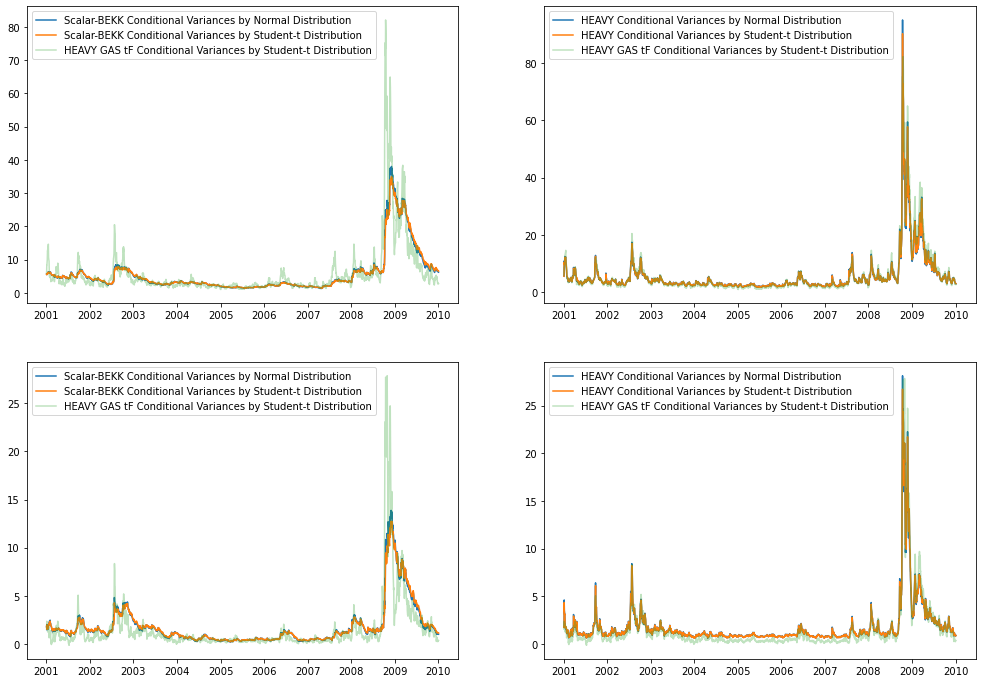

In [86]:
fig = plt.figure(figsize=(17,12))
plt.subplot(2, 2, 1)
plt.plot(df_daily['date'][0:insample_num], v_BEKK_Norm[:,0,0],label= 'Scalar-BEKK Conditional Variances by Normal Distribution')
plt.plot(df_daily['date'][0:insample_num], v_BEKK_T[:,0,0],label= 'Scalar-BEKK Conditional Variances by Student-t Distribution')
plt.plot(df_daily['date'][0:insample_num], v_HEAVYGAStF[:,0,0],label= 'HEAVY GAS tF Conditional Variances by Student-t Distribution',alpha= 0.3)
plt.legend()
#plt.title('Scalar BEKK AA Conditional Variance')

plt.subplot(2, 2, 2)
plt.plot(df_daily['date'][0:insample_num], v_HEAVY_Norm[:,0,0],label= 'HEAVY Conditional Variances by Normal Distribution')
plt.plot(df_daily['date'][0:insample_num], v_HEAVY_T[:,0,0],label= 'HEAVY Conditional Variances by Student-t Distribution')
plt.plot(df_daily['date'][0:insample_num], v_HEAVYGAStF[:,0,0],label= 'HEAVY GAS tF Conditional Variances by Student-t Distribution', alpha= 0.3)
plt.legend()


plt.subplot(2, 2, 3)
plt.plot(df_daily['date'][0:insample_num], v_BEKK_Norm[:,0,1],label= 'Scalar-BEKK Conditional Variances by Normal Distribution')
plt.plot(df_daily['date'][0:insample_num], v_BEKK_T[:,0,1],label= 'Scalar-BEKK Conditional Variances by Student-t Distribution')
plt.plot(df_daily['date'][0:insample_num], v_HEAVYGAStF[:,0,1],label= 'HEAVY GAS tF Conditional Variances by Student-t Distribution',alpha= 0.3)
plt.legend()
#plt.title('Scalar BEKK AA Conditional Variance')

plt.subplot(2, 2, 4)
plt.plot(df_daily['date'][0:insample_num], v_HEAVY_Norm[:,0,1],label= 'HEAVY Conditional Variances by Normal Distribution')
plt.plot(df_daily['date'][0:insample_num], v_HEAVY_T[:,0,1],label= 'HEAVY Conditional Variances by Student-t Distribution')
plt.plot(df_daily['date'][0:insample_num], v_HEAVYGAStF[:,0,1],label= 'HEAVY GAS tF Conditional Variances by Student-t Distribution', alpha= 0.3)
plt.legend()


#plt.savefig('HEAVY_Plots.png')
plt.show()

In [97]:
v_RM.shape

(2264, 25)

In [98]:
Insample_v_RM5by5 = []
for i in range(len(v_RM)):
    Insamplev_RM_5by5 = v_RM[i].reshape(-5,5)
    Insample_v_RM5by5.append(Insamplev_RM_5by5 )
Insample_v_RM5by5 = np.array(Insample_v_RM5by5)

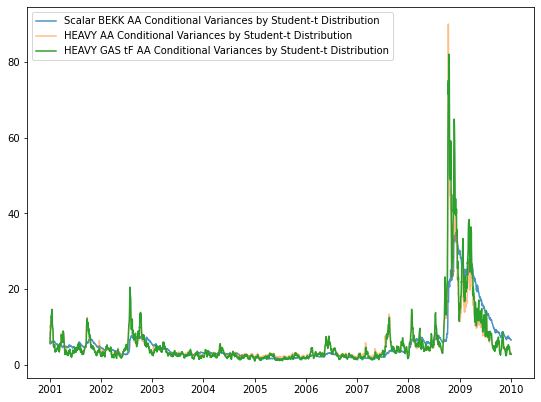

In [233]:
fig = plt.figure(figsize=(20,15))

plt.subplot(2, 2, 1)
#plt.plot(df_daily['date'][0:insample_num], v_BEKK_Norm[:,0,0],label= 'Scalar BEKK AA Conditional Variances by Normal Distribution',alpha = 0.8)
plt.plot(df_daily['date'][0:insample_num], v_BEKK_T[:,0,0],label= 'Scalar BEKK AA Conditional Variances by Student-t Distribution',alpha = 0.8)

#plt.plot(df_daily['date'][0:insample_num], v_HEAVY_Norm[:,0,0],label= 'HEAVY AA Conditional Variances by Normal Distribution',alpha = 0.5)
plt.plot(df_daily['date'][0:insample_num], v_HEAVY_T[:,0,0],label= 'HEAVY AA Conditional Variances by Student-t Distribution',alpha = 0.5)

plt.plot(df_daily['date'][0:insample_num], v_HEAVYGAStF[:,0,0],label= 'HEAVY GAS tF AA Conditional Variances by Student-t Distribution')

#plt.plot(df_daily['date'][0:insample_num], Insample_v_RM5by5[:,0,0],label= 'True Variances',alpha = 0.3)
plt.legend()
#plt.title('Scalar BEKK AA Conditional Variance')

#plt.savefig('HEAVY_Plots.png')
plt.show()

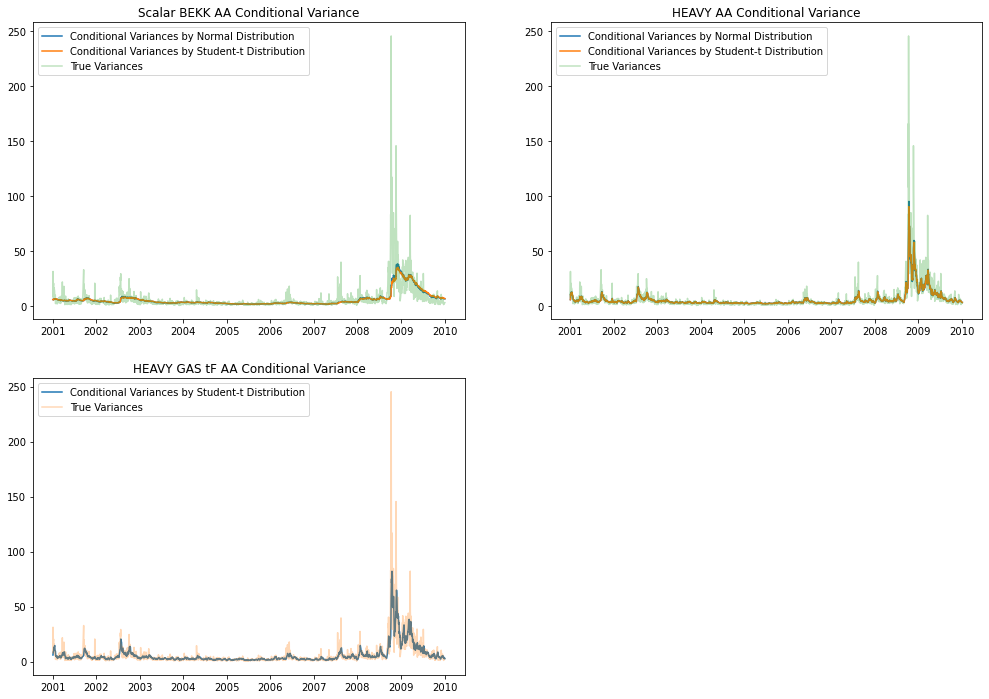

In [102]:
fig = plt.figure(figsize=(17,12))

plt.subplot(2, 2, 1)
plt.plot(df_daily['date'][0:insample_num], v_BEKK_Norm[:,0,0],label= 'Conditional Variances by Normal Distribution')
plt.plot(df_daily['date'][0:insample_num], v_BEKK_T[:,0,0],label= 'Conditional Variances by Student-t Distribution')
plt.plot(df_daily['date'][0:insample_num], Insample_v_RM5by5[:,0,0],label= 'True Variances',alpha = 0.3)
plt.legend()
plt.title('Scalar BEKK AA Conditional Variance')

plt.subplot(2, 2, 2)
plt.plot(df_daily['date'][0:insample_num], v_HEAVY_Norm[:,0,0],label= 'Conditional Variances by Normal Distribution')
plt.plot(df_daily['date'][0:insample_num], v_HEAVY_T[:,0,0],label= 'Conditional Variances by Student-t Distribution')
plt.plot(df_daily['date'][0:insample_num], Insample_v_RM5by5[:,0,0],label= 'True Variances',alpha = 0.3)
plt.legend()
plt.title('HEAVY AA Conditional Variance')

plt.subplot(2, 2, 3)
plt.plot(df_daily['date'][0:insample_num], v_HEAVYGAStF[:,0,0],label= 'Conditional Variances by Student-t Distribution')
plt.plot(df_daily['date'][0:insample_num], Insample_v_RM5by5[:,0,0],label= 'True Variances',alpha = 0.3)
plt.legend()
plt.title('HEAVY GAS tF AA Conditional Variance')

#plt.savefig('HEAVY_Plots.png')
plt.show()

In [47]:
def RMSE(Bekk_Norm_diff):
    RMSE = []
    for i in range(753):
        rmse = np.linalg.norm(Bekk_Norm_diff[i,:,:])*(1/np.sqrt(i+1))
        RMSE.append(rmse)
    return (np.mean(RMSE), np.std(RMSE))

In [48]:
Bekk_Norm_diff = RMSE(BEKK_NormPred - V_RM5by5)
Bekk_T_diff = RMSE(BEKK_TPred - V_RM5by5)
HEAVY_Norm_diff = RMSE(HEAVY_NormPred - V_RM5by5)
HEAVY_T_diff = RMSE(HEAVY_TPred - V_RM5by5)
GAS_diff = RMSE(GAS_TPred - V_RM5by5)

In [49]:
Bekk_Norm_diff

(0.33439389041733575, 0.7250055576081222)

In [50]:
Bekk_T_diff

(0.3440275223308213, 0.7354574187656554)

In [51]:
GAS_diff

(0.271682347868783, 0.6857404660260931)

In [52]:
HEAVY_T_diff

(0.3029989214841517, 0.6670133153381659)

In [53]:
HEAVY_Norm_diff

(0.30256934461923296, 0.6638312622396602)

In [54]:
RMSE = {'Mean':[Bekk_Norm_diff[0], Bekk_T_diff[0], HEAVY_Norm_diff[0], HEAVY_T_diff[0], GAS_diff[0]], 
               'st.dev.':[Bekk_Norm_diff[1], Bekk_T_diff[1], HEAVY_Norm_diff[1],HEAVY_T_diff[1], GAS_diff[1]]
              }

In [55]:
df_rmse = pd.DataFrame (RMSE, columns = ['Mean','st.dev.'], index=['BEKK Norm','BEKK T','HEAVY Norm','HEAVY T','HEAVY GAS tF'])

In [56]:
df_rmse

,Mean,st.dev.
BEKK Norm,0.334394,0.725006
BEKK T,0.344028,0.735457
HEAVY Norm,0.302569,0.663831
HEAVY T,0.302999,0.667013
HEAVY GAS tF,0.271682,0.685740


In [57]:
print(df_rmse.to_latex(float_format="%.3f",index=True)) 

\begin{tabular}{lrr}
\toprule
{} &  Mean &  st.dev. \\
\midrule
BEKK Norm    & 0.334 &    0.725 \\
BEKK T       & 0.344 &    0.735 \\
HEAVY Norm   & 0.303 &    0.664 \\
HEAVY T      & 0.303 &    0.667 \\
HEAVY GAS tF & 0.272 &    0.686 \\
\bottomrule
\end{tabular}



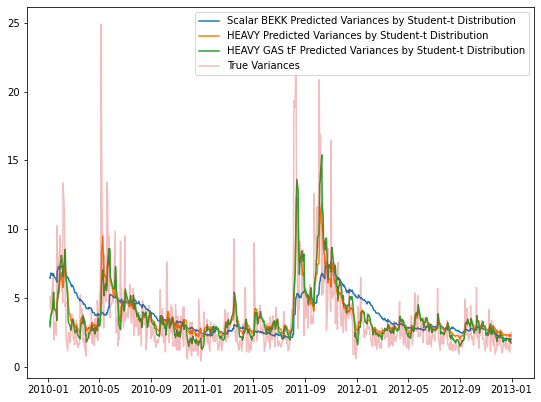

In [235]:
fig = plt.figure(figsize=(20,15))

plt.subplot(2, 2, 1)
#plt.plot(df_daily['date'][insample_num:], BEKK_NormPred[:,0,0],label= 'Predicted Variances by Normal Distribution')
plt.plot(df_daily['date'][insample_num:], BEKK_TPred[:,0,0],label= 'Scalar BEKK Predicted Variances by Student-t Distribution')
plt.plot(df_daily['date'][insample_num:], HEAVY_TPred[:,0,0],label= 'HEAVY Predicted Variances by Student-t Distribution')
plt.plot(df_daily['date'][insample_num:], GAS_TPred[:,0,0],label= 'HEAVY GAS tF Predicted Variances by Student-t Distribution')

plt.plot(df_daily['date'][insample_num:], V_RM5by5[:,0,0],label= 'True Variances',alpha = 0.3)
plt.legend()
#plt.title('Scalar BEKK AA Predicted Variance')

#plt.savefig('Forecasted_HEAVY_Plots.png')
plt.show()

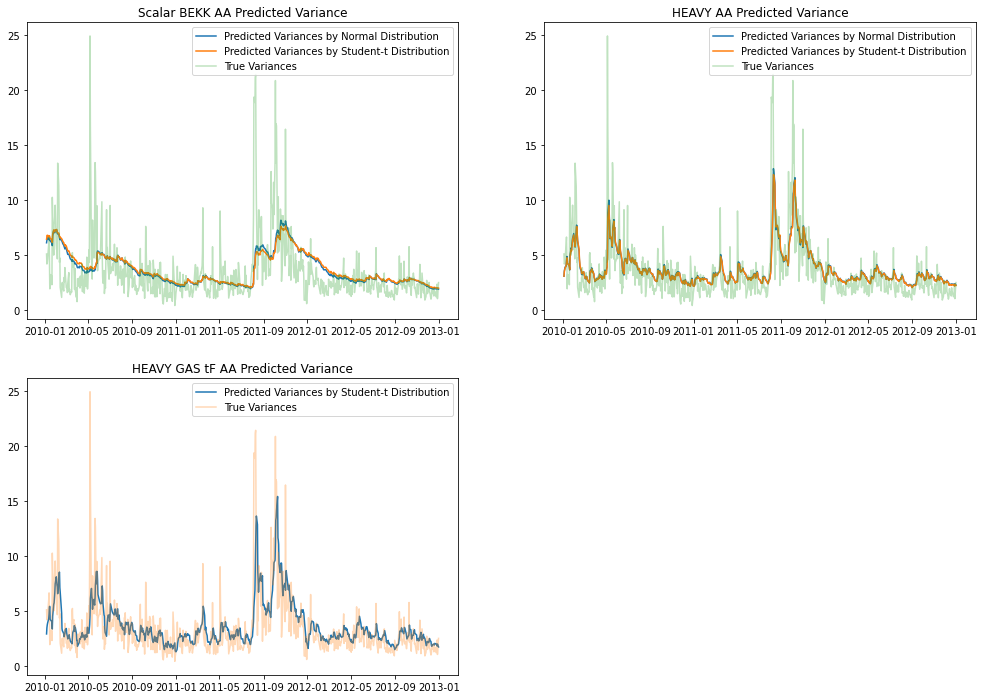

In [58]:
fig = plt.figure(figsize=(17,12))

plt.subplot(2, 2, 1)
plt.plot(df_daily['date'][insample_num:], BEKK_NormPred[:,0,0],label= 'Predicted Variances by Normal Distribution')
plt.plot(df_daily['date'][insample_num:], BEKK_TPred[:,0,0],label= 'Predicted Variances by Student-t Distribution')
plt.plot(df_daily['date'][insample_num:], V_RM5by5[:,0,0],label= 'True Variances',alpha = 0.3)
plt.legend()
plt.title('Scalar BEKK AA Predicted Variance')

plt.subplot(2, 2, 2)
plt.plot(df_daily['date'][insample_num:], HEAVY_NormPred[:,0,0],label= 'Predicted Variances by Normal Distribution')
plt.plot(df_daily['date'][insample_num:], HEAVY_TPred[:,0,0],label= 'Predicted Variances by Student-t Distribution')
plt.plot(df_daily['date'][insample_num:], V_RM5by5[:,0,0],label= 'True Variances',alpha = 0.3)
plt.legend()
plt.title('HEAVY AA Predicted Variance')

plt.subplot(2, 2, 3)
plt.plot(df_daily['date'][insample_num:], GAS_TPred[:,0,0],label= 'Predicted Variances by Student-t Distribution')
plt.plot(df_daily['date'][insample_num:], V_RM5by5[:,0,0],label= 'True Variances',alpha = 0.3)
plt.legend()
plt.title('HEAVY GAS tF AA Predicted Variance')

#plt.savefig('Forecasted_HEAVY_Plots.png')
plt.show()

In [157]:
def calculate_portfolio_var(w,v):
    #w = np.matrix(w)
    return (w @ v @ w.T)#[0,0]
def cw1(w):
    return np.sum(w) - 1
cons = {'type':'eq', 'fun': cw1}

# Minimum Portfolio Variance
def MinVariance(V):
    w0 = np.array([0.2,0.2,0.2,0.2,0.2])
    Weights = []
    for i in range(753):
        bnd=[(0, 1),(0, 1),(0, 1),(0, 1),(0, 1)]
        res= minimize(calculate_portfolio_var, w0, args=V[i,:,:],bounds = bnd,method='SLSQP',constraints=cons)
        Weights.append(res.x)
    return np.array(Weights)

def PortRet(Weights, vOutSample):
    PortRet = np.multiply(Weights,vOutSample)
    PortRetSum = np.sum(PortRet,axis=1)
    return PortRetSum
def real_portfolio_var(w,v):
    Port_Var = []
    for i in range(753):
        PortVar = np.sqrt(w[i] @ v[i,:,:] @ w[i].T)
        Port_Var.append(PortVar)
    return np.array(Port_Var)

In [158]:
vOutSample = np.array( df_daily.iloc[insample_num:,[1,2,3,4,5]] )

In [159]:
BEKK_Norm_Weights = MinVariance(BEKK_NormPred)
BEKK_NormPortRet = PortRet(BEKK_Norm_Weights, vOutSample)
BEKK_NormPortVarTime = real_portfolio_var(BEKK_Norm_Weights,V_RM5by5)
BEKK_NormPortVar = np.mean( real_portfolio_var(BEKK_Norm_Weights,V_RM5by5) )
print(BEKK_NormPortVar)


BEKK_T_Weights = MinVariance(BEKK_TPred)
BEKK_T_PortRet = PortRet(BEKK_T_Weights, vOutSample)
BEKK_T_PortVarTime = real_portfolio_var(BEKK_T_Weights,V_RM5by5)
BEKK_T_PortVar = np.mean( real_portfolio_var(BEKK_T_Weights,V_RM5by5) )
print(BEKK_T_PortVar)

0.7524448859015815
0.7526230954371268


In [160]:
HEAVY_Norm_Weights = MinVariance(HEAVY_NormPred)
HEAVY_NormPortRet = PortRet(HEAVY_Norm_Weights, vOutSample)
HEAVY_NormPortVarTime = real_portfolio_var(HEAVY_Norm_Weights,V_RM5by5)
HEAVY_NormPortVar = np.mean( real_portfolio_var(HEAVY_Norm_Weights,V_RM5by5) )
print(HEAVY_NormPortVar)


HEAVY_T_Weights = MinVariance(HEAVY_TPred)
HEAVY_T_PortRet = PortRet(HEAVY_T_Weights, vOutSample)
HEAVY_T_PortVarTime = real_portfolio_var(HEAVY_T_Weights,V_RM5by5)
HEAVY_T_PortVar = np.mean( real_portfolio_var(HEAVY_T_Weights,V_RM5by5) )
print(HEAVY_T_PortVar)

0.7498302023246777
0.7500713313905465


In [161]:
GAS_T_Weights = MinVariance(GAS_TPred)
GAS_T_PortRet = PortRet(GAS_T_Weights, vOutSample)
GAS_T_PortVarTime = real_portfolio_var(GAS_T_Weights,V_RM5by5)
GAS_T_PortVar = np.mean( real_portfolio_var(GAS_T_Weights,V_RM5by5) )
print(GAS_T_PortVar)

0.7421058359472251


In [162]:
from dm_test import dm_test

In [163]:
DM_BEKK_NORM = dm_test(GAS_T_PortVarTime,GAS_T_PortVarTime,BEKK_NormPortVarTime)
DM_BEKK_T = dm_test(GAS_T_PortVarTime,GAS_T_PortVarTime,BEKK_T_PortVarTime)
DM_HEAVY_NORM = dm_test(GAS_T_PortVarTime,GAS_T_PortVarTime,HEAVY_NormPortVarTime)
DM_HEAVY_T = dm_test(GAS_T_PortVarTime,GAS_T_PortVarTime,HEAVY_T_PortVarTime)

In [164]:
DM_BEKK_NORM

dm_return(DM=-9.68612921163375, p_value=5.468422494195363e-21)

In [165]:
DM_BEKK_T

dm_return(DM=-8.907566299467472, p_value=3.878961933664269e-18)

In [166]:
DM_HEAVY_NORM

dm_return(DM=-7.780407599735736, p_value=2.3881485159908296e-14)

In [167]:
DM_HEAVY_T

dm_return(DM=-7.931482622214459, p_value=7.838852124870053e-15)

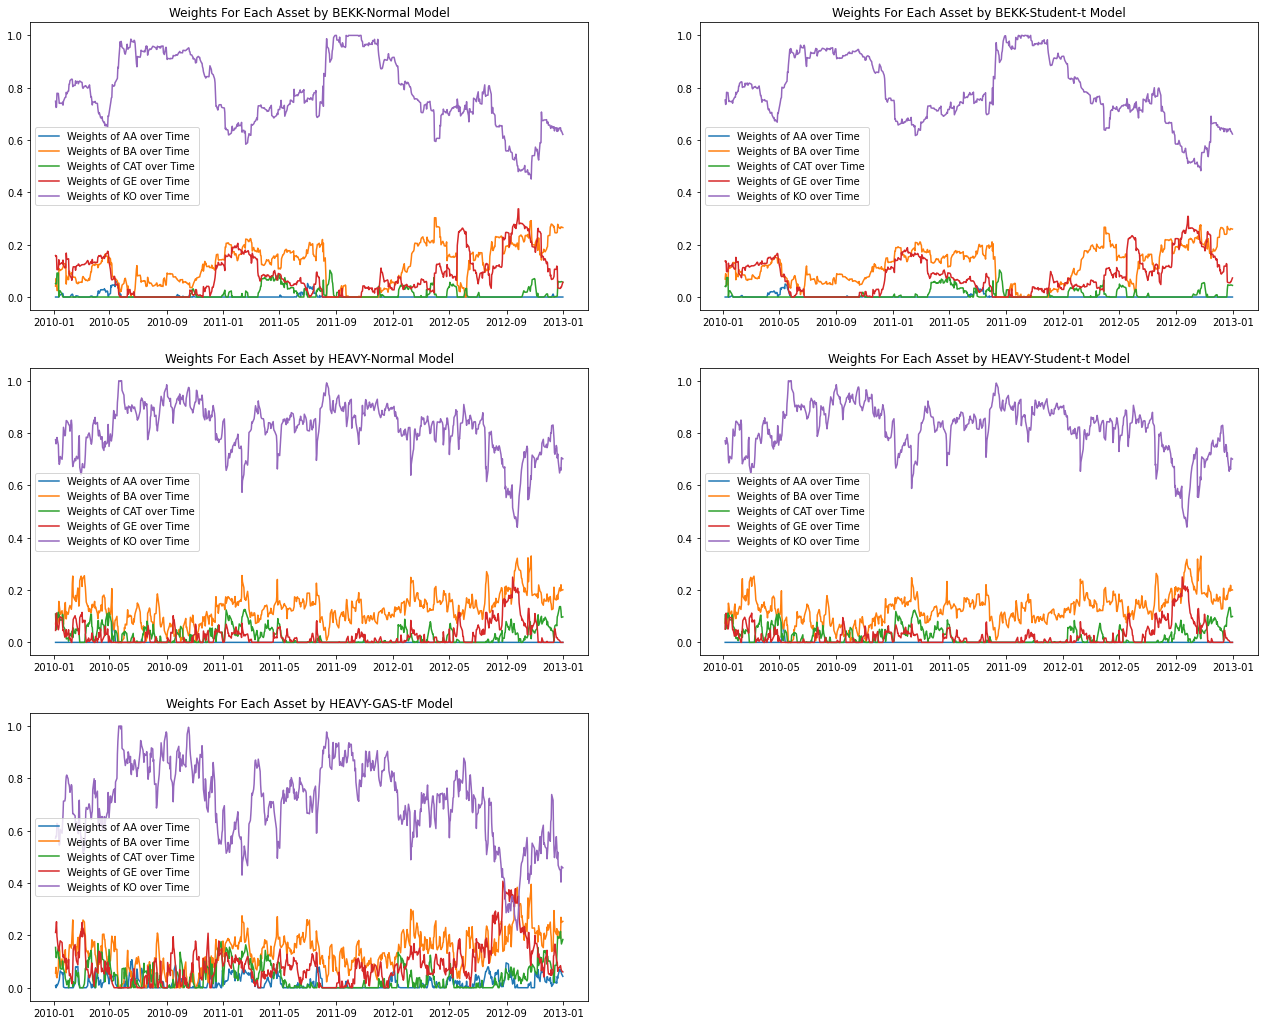

In [168]:
fig = plt.figure(figsize=(22,18))

plt.subplot(3, 2, 1)
plt.plot(df_daily['date'][insample_num:], BEKK_Norm_Weights[:,0], label= 'Weights of AA over Time')
plt.plot(df_daily['date'][insample_num:], BEKK_Norm_Weights[:,1], label= 'Weights of BA over Time')
plt.plot(df_daily['date'][insample_num:], BEKK_Norm_Weights[:,2], label= 'Weights of CAT over Time')
plt.plot(df_daily['date'][insample_num:], BEKK_Norm_Weights[:,3], label= 'Weights of GE over Time')
plt.plot(df_daily['date'][insample_num:], BEKK_Norm_Weights[:,4], label= 'Weights of KO over Time')
plt.legend()
plt.title('Weights For Each Asset by BEKK-Normal Model')

plt.subplot(3, 2, 2)
plt.plot(df_daily['date'][insample_num:], BEKK_T_Weights[:,0], label= 'Weights of AA over Time')
plt.plot(df_daily['date'][insample_num:], BEKK_T_Weights[:,1], label= 'Weights of BA over Time')
plt.plot(df_daily['date'][insample_num:], BEKK_T_Weights[:,2], label= 'Weights of CAT over Time')
plt.plot(df_daily['date'][insample_num:], BEKK_T_Weights[:,3], label= 'Weights of GE over Time')
plt.plot(df_daily['date'][insample_num:], BEKK_T_Weights[:,4], label= 'Weights of KO over Time')
plt.legend()
plt.title('Weights For Each Asset by BEKK-Student-t Model')

plt.subplot(3, 2, 3)
plt.plot(df_daily['date'][insample_num:], HEAVY_Norm_Weights[:,0], label= 'Weights of AA over Time')
plt.plot(df_daily['date'][insample_num:], HEAVY_Norm_Weights[:,1], label= 'Weights of BA over Time')
plt.plot(df_daily['date'][insample_num:], HEAVY_Norm_Weights[:,2], label= 'Weights of CAT over Time')
plt.plot(df_daily['date'][insample_num:], HEAVY_Norm_Weights[:,3], label= 'Weights of GE over Time')
plt.plot(df_daily['date'][insample_num:], HEAVY_Norm_Weights[:,4], label= 'Weights of KO over Time')
plt.legend()
plt.title('Weights For Each Asset by HEAVY-Normal Model')

plt.subplot(3, 2, 4)
plt.plot(df_daily['date'][insample_num:], HEAVY_T_Weights[:,0], label= 'Weights of AA over Time')
plt.plot(df_daily['date'][insample_num:], HEAVY_T_Weights[:,1], label= 'Weights of BA over Time')
plt.plot(df_daily['date'][insample_num:], HEAVY_T_Weights[:,2], label= 'Weights of CAT over Time')
plt.plot(df_daily['date'][insample_num:], HEAVY_T_Weights[:,3], label= 'Weights of GE over Time')
plt.plot(df_daily['date'][insample_num:], HEAVY_T_Weights[:,4], label= 'Weights of KO over Time')
plt.legend()
plt.title('Weights For Each Asset by HEAVY-Student-t Model')

plt.subplot(3, 2, 5)
plt.plot(df_daily['date'][insample_num:], GAS_T_Weights[:,0], label= 'Weights of AA over Time')
plt.plot(df_daily['date'][insample_num:], GAS_T_Weights[:,1], label= 'Weights of BA over Time')
plt.plot(df_daily['date'][insample_num:], GAS_T_Weights[:,2], label= 'Weights of CAT over Time')
plt.plot(df_daily['date'][insample_num:], GAS_T_Weights[:,3], label= 'Weights of GE over Time')
plt.plot(df_daily['date'][insample_num:], GAS_T_Weights[:,4], label= 'Weights of KO over Time')
plt.legend()
plt.title('Weights For Each Asset by HEAVY-GAS-tF Model')

plt.show()

#### Mean-Variance  Portfolio

In [169]:
def calculate_portfolio_var(w,v):
    #w = np.matrix(w)
    return (w @ v @ w.T)#[0,0]

def cw1(w):
    return np.sum(w) - 1

def cw2(w):
    return w.T @ dMu - (-2.5)

cons1 = {'type':'eq', 'fun': cw1}
cons2 = {'type':'ineq', 'fun': cw2}
cons = [cons1, cons2]

# Mean - Portfolio Variance
w0 = (np.array([0.1,0.3,0.2,0.2,0.2])).reshape(-1,1)
def Mean_Variance(V):
    Weights = []
    for i in range(753):
        bnd=[(0, 1),(0, 1),(0, 1),(0, 1),(0, 1)]
        res= minimize(calculate_portfolio_var, w0, args=V[i,:,:],bounds = bnd,method='SLSQP',constraints=cons)
        Weights.append(res.x)
    return np.array(Weights)

In [170]:
BEKK_Norm_Weights1 = Mean_Variance(BEKK_NormPred)
BEKK_NormPortRet1 = PortRet(BEKK_Norm_Weights1, vOutSample)
BEKK_NormPortVarTime1 = real_portfolio_var(BEKK_Norm_Weights1,V_RM5by5)
BEKK_NormPortVar1 = np.mean( real_portfolio_var(BEKK_Norm_Weights1,V_RM5by5) )
print(BEKK_NormPortVar1)


BEKK_T_Weights1 = Mean_Variance(BEKK_TPred)
BEKK_T_PortRet1 = PortRet(BEKK_T_Weights1, vOutSample)
BEKK_T_PortVarTime1 = real_portfolio_var(BEKK_T_Weights1,V_RM5by5)
BEKK_T_PortVar1 = np.mean( real_portfolio_var(BEKK_T_Weights1,V_RM5by5) )
print(BEKK_T_PortVar1)

0.7524441457088444
0.7526239675892429


In [171]:
HEAVY_Norm_Weights1 = Mean_Variance(HEAVY_NormPred)
HEAVY_NormPortRet1 = PortRet(HEAVY_Norm_Weights1, vOutSample)
HEAVY_NormPortVarTime1 = real_portfolio_var(HEAVY_Norm_Weights1,V_RM5by5)
HEAVY_NormPortVar1 = np.mean( real_portfolio_var(HEAVY_Norm_Weights1,V_RM5by5) )
print(HEAVY_NormPortVar1)


HEAVY_T_Weights1 = Mean_Variance(HEAVY_TPred)
HEAVY_T_PortRet1 = PortRet(HEAVY_T_Weights1, vOutSample)
HEAVY_T_PortVarTime1 = real_portfolio_var(HEAVY_T_Weights1,V_RM5by5)
HEAVY_T_PortVar1 = np.mean( real_portfolio_var(HEAVY_T_Weights1,V_RM5by5) )
print(HEAVY_T_PortVar1)

0.7498332834762498
0.7500776794781779


In [172]:
GAS_T_Weights1 = Mean_Variance(GAS_TPred)
GAS_T_PortRet1 = PortRet(GAS_T_Weights1, vOutSample)
GAS_T_PortVarTime1 = real_portfolio_var(GAS_T_Weights1,V_RM5by5)
GAS_T_PortVar1 = np.mean( real_portfolio_var(GAS_T_Weights1,V_RM5by5) )
print(GAS_T_PortVar1)

0.7421040068977743


In [173]:
DM1_BEKK_NORM = dm_test(GAS_T_PortVarTime1,GAS_T_PortVarTime1,BEKK_NormPortVarTime1)
DM1_BEKK_T = dm_test(GAS_T_PortVarTime1,GAS_T_PortVarTime1,BEKK_T_PortVarTime1)
DM1_HEAVY_NORM = dm_test(GAS_T_PortVarTime1,GAS_T_PortVarTime1,HEAVY_NormPortVarTime1)
DM1_HEAVY_T = dm_test(GAS_T_PortVarTime1,GAS_T_PortVarTime1,HEAVY_T_PortVarTime1)

In [174]:
DM1_BEKK_NORM

dm_return(DM=-9.68787839357846, p_value=5.385815736100912e-21)

In [175]:
DM1_BEKK_T

dm_return(DM=-8.907698695142757, p_value=3.8747754362690175e-18)

In [176]:
DM1_HEAVY_NORM

dm_return(DM=-7.78495435904051, p_value=2.3099994572443967e-14)

In [177]:
DM1_HEAVY_T

dm_return(DM=-7.935529365962009, p_value=7.606563098623804e-15)

In [178]:
portstd = {'Port Std by Minimum Variance':[BEKK_NormPortVar, BEKK_T_PortVar, HEAVY_NormPortVar,HEAVY_T_PortVar, GAS_T_PortVar],
          'Port Std by Mean Variance':[BEKK_NormPortVar1, BEKK_T_PortVar1, HEAVY_NormPortVar1,HEAVY_T_PortVar1, GAS_T_PortVar1]}

In [179]:
df_portstd = pd.DataFrame (portstd, columns = ['Port Std by Minimum Variance','Port Std by Mean Variance'], index=['BEKK Norm','BEKK T','HEAVY Norm','HEAVY T','HEAVY GAS tF'])

In [180]:
df_portstd

,Port Std by Minimum Variance,Port Std by Mean Variance
BEKK Norm,0.752445,0.752444
BEKK T,0.752623,0.752624
HEAVY Norm,0.749830,0.749833
HEAVY T,0.750071,0.750078
HEAVY GAS tF,0.742106,0.742104


In [181]:
print(df_portstd.to_latex(float_format="%.3f",index=True)) 

\begin{tabular}{lrr}
\toprule
{} &  Port Std by Minimum Variance &  Port Std by Mean Variance \\
\midrule
BEKK Norm    &                         0.752 &                      0.752 \\
BEKK T       &                         0.753 &                      0.753 \\
HEAVY Norm   &                         0.750 &                      0.750 \\
HEAVY T      &                         0.750 &                      0.750 \\
HEAVY GAS tF &                         0.742 &                      0.742 \\
\bottomrule
\end{tabular}



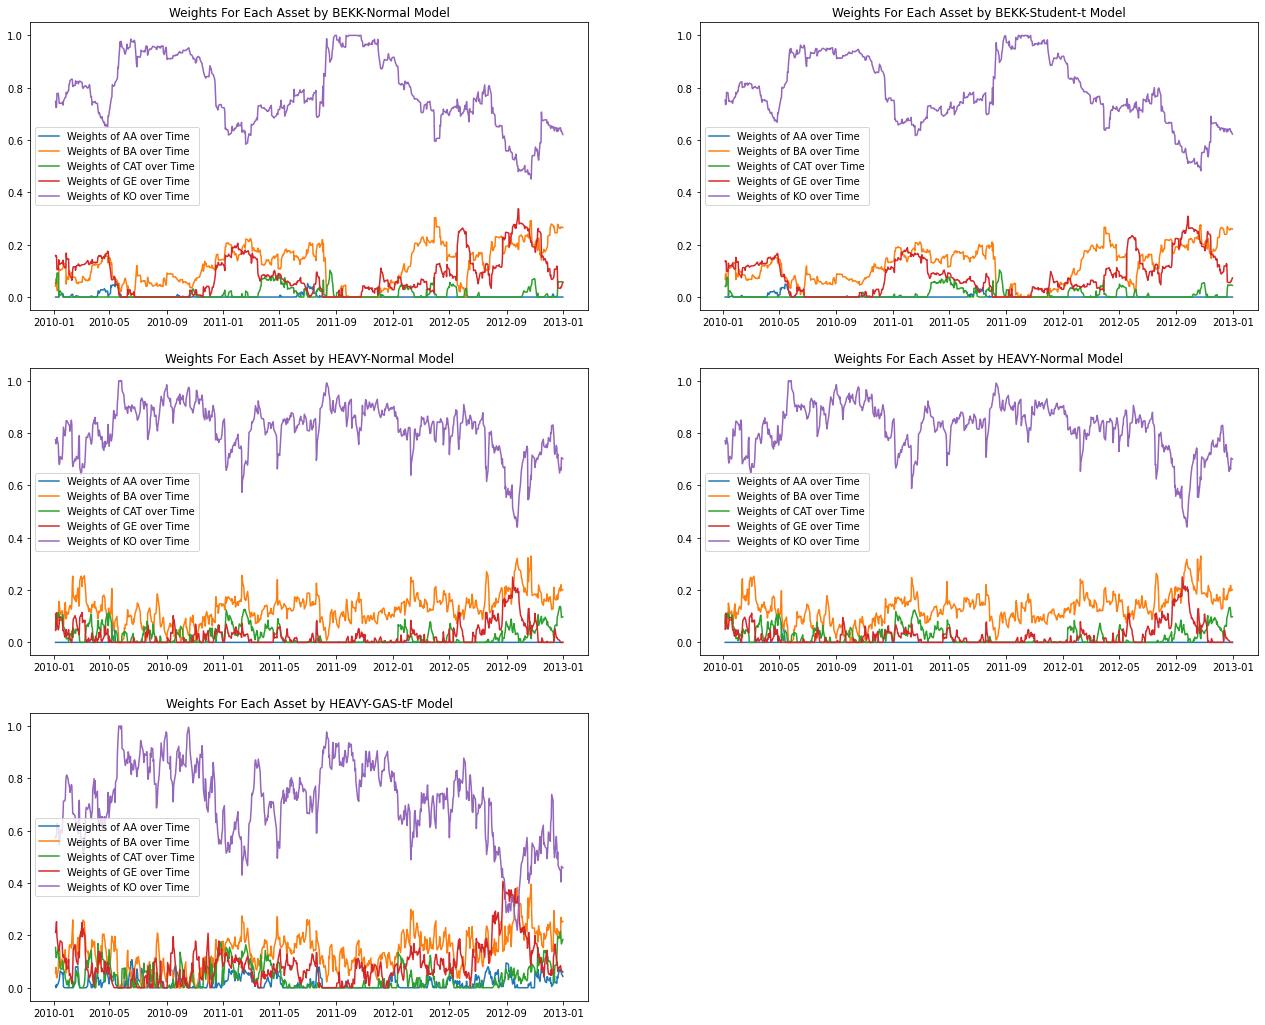

In [73]:
fig = plt.figure(figsize=(22,18))

plt.subplot(3, 2, 1)
plt.plot(df_daily['date'][insample_num:], BEKK_Norm_Weights1[:,0], label= 'Weights of AA over Time')
plt.plot(df_daily['date'][insample_num:], BEKK_Norm_Weights1[:,1], label= 'Weights of BA over Time')
plt.plot(df_daily['date'][insample_num:], BEKK_Norm_Weights1[:,2], label= 'Weights of CAT over Time')
plt.plot(df_daily['date'][insample_num:], BEKK_Norm_Weights1[:,3], label= 'Weights of GE over Time')
plt.plot(df_daily['date'][insample_num:], BEKK_Norm_Weights1[:,4], label= 'Weights of KO over Time')
plt.legend()
plt.title('Weights For Each Asset by BEKK-Normal Model')

plt.subplot(3, 2, 2)
plt.plot(df_daily['date'][insample_num:], BEKK_T_Weights1[:,0], label= 'Weights of AA over Time')
plt.plot(df_daily['date'][insample_num:], BEKK_T_Weights1[:,1], label= 'Weights of BA over Time')
plt.plot(df_daily['date'][insample_num:], BEKK_T_Weights1[:,2], label= 'Weights of CAT over Time')
plt.plot(df_daily['date'][insample_num:], BEKK_T_Weights1[:,3], label= 'Weights of GE over Time')
plt.plot(df_daily['date'][insample_num:], BEKK_T_Weights1[:,4], label= 'Weights of KO over Time')
plt.legend()
plt.title('Weights For Each Asset by BEKK-Student-t Model')

plt.subplot(3, 2, 3)
plt.plot(df_daily['date'][insample_num:], HEAVY_Norm_Weights1[:,0], label= 'Weights of AA over Time')
plt.plot(df_daily['date'][insample_num:], HEAVY_Norm_Weights1[:,1], label= 'Weights of BA over Time')
plt.plot(df_daily['date'][insample_num:], HEAVY_Norm_Weights1[:,2], label= 'Weights of CAT over Time')
plt.plot(df_daily['date'][insample_num:], HEAVY_Norm_Weights1[:,3], label= 'Weights of GE over Time')
plt.plot(df_daily['date'][insample_num:], HEAVY_Norm_Weights1[:,4], label= 'Weights of KO over Time')
plt.legend()
plt.title('Weights For Each Asset by HEAVY-Normal Model')

plt.subplot(3, 2, 4)
plt.plot(df_daily['date'][insample_num:], HEAVY_T_Weights1[:,0], label= 'Weights of AA over Time')
plt.plot(df_daily['date'][insample_num:], HEAVY_T_Weights1[:,1], label= 'Weights of BA over Time')
plt.plot(df_daily['date'][insample_num:], HEAVY_T_Weights1[:,2], label= 'Weights of CAT over Time')
plt.plot(df_daily['date'][insample_num:], HEAVY_T_Weights1[:,3], label= 'Weights of GE over Time')
plt.plot(df_daily['date'][insample_num:], HEAVY_T_Weights1[:,4], label= 'Weights of KO over Time')
plt.legend()
plt.title('Weights For Each Asset by HEAVY-Normal Model')

plt.subplot(3, 2, 5)
plt.plot(df_daily['date'][insample_num:], GAS_T_Weights1[:,0], label= 'Weights of AA over Time')
plt.plot(df_daily['date'][insample_num:], GAS_T_Weights1[:,1], label= 'Weights of BA over Time')
plt.plot(df_daily['date'][insample_num:], GAS_T_Weights1[:,2], label= 'Weights of CAT over Time')
plt.plot(df_daily['date'][insample_num:], GAS_T_Weights1[:,3], label= 'Weights of GE over Time')
plt.plot(df_daily['date'][insample_num:], GAS_T_Weights1[:,4], label= 'Weights of KO over Time')
plt.legend()
plt.title('Weights For Each Asset by HEAVY-GAS-tF Model')

plt.show()

In [74]:
from dm_test import dm_test

In [75]:
dm_test(actual_lst,pred1_lst,pred2_lst,h = 1, crit="MAD")

NameError: name 'actual_lst' is not defined

In [ ]:
A = tao.T @ np.linalg.inv(BEKK_NormPred) @ tao
B = tao.T @ np.linalg.inv(BEKK_NormPred) @ dMu
C = dMu.T @ np.linalg.inv(BEKK_NormPred) @ dMu
q = -1.5

In [ ]:
Weights_MV = []
for i in range(753):
    w_MV = ((C-q*B)@np.linalg.inv(BEKK_NormPred[i,:,:])@tao)/(A@C-B**2) + ((q*A-B)@np.linalg.inv(BEKK_NormPred[i,:,:])@dMu)/(A@C-B**2)

In [ ]:
tao = np.array([1,1,1,1,1]).reshape(-1,1)

In [ ]:
w.T @ tao

In [ ]:
w.T @ dMu